In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file
from scipy import stats
import random

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 
# Code to supress warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [5]:
#Read the json file


logins = pd.read_json('../raw_data/logins.json')

In [7]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [12]:
logins.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [14]:
#logins['timestamp'] = pd.to_datetime(logins['timestamp'])
logins.set_index('login_time', inplace=True)

In [16]:
#Generate a new dataframe with 15 minute intervals 

logins_15min_int = logins.resample('15T').size().reset_index(name='count')
logins_15min_int.head(20)


login_time  count
0  1970-01-01 20:00:00      2
1  1970-01-01 20:15:00      6
2  1970-01-01 20:30:00      9
3  1970-01-01 20:45:00      7
4  1970-01-01 21:00:00      1
5  1970-01-01 21:15:00      4
6  1970-01-01 21:30:00      0
7  1970-01-01 21:45:00      4
8  1970-01-01 22:00:00      9
9  1970-01-01 22:15:00      8
10 1970-01-01 22:30:00      1
11 1970-01-01 22:45:00      3
12 1970-01-01 23:00:00     16
13 1970-01-01 23:15:00     13
14 1970-01-01 23:30:00     14
15 1970-01-01 23:45:00     15
16 1970-01-02 00:00:00     10
17 1970-01-02 00:15:00     18
18 1970-01-02 00:30:00     12
19 1970-01-02 00:45:00     13

In [18]:
logins_15min_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  9788 non-null   datetime64[ns]
 1   count       9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


In [20]:
logins_15min_int.describe()

login_time        count
count                           9788  9788.000000
mean   1970-02-21 19:22:29.999999999     9.515938
min              1970-01-01 20:00:00     0.000000
25%              1970-01-27 07:41:15     3.000000
50%              1970-02-21 19:22:30     7.000000
75%              1970-03-19 07:03:45    13.000000
max              1970-04-13 18:45:00    73.000000
std                              NaN     8.328818

<Figure size 10000x1200 with 0 Axes>

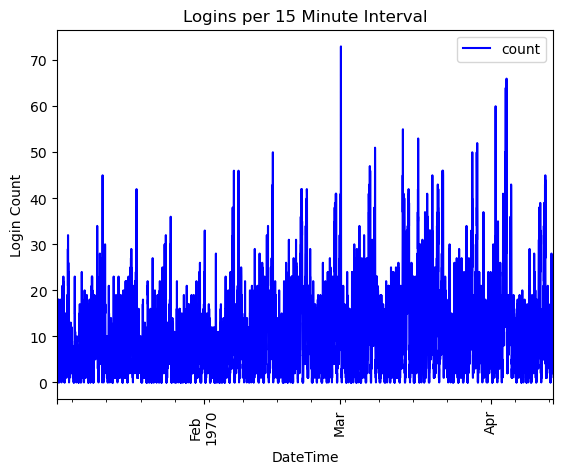

In [22]:
plt.figure(figsize=(100, 12))
logins_15min_int.plot(x='login_time', y='count', kind='line', color='blue')
plt.title('Logins per 15 Minute Interval')
plt.xlabel('DateTime')
plt.ylabel('Login Count')
plt.xticks(rotation=90)
plt.show()



<Figure size 2000x600 with 0 Axes>

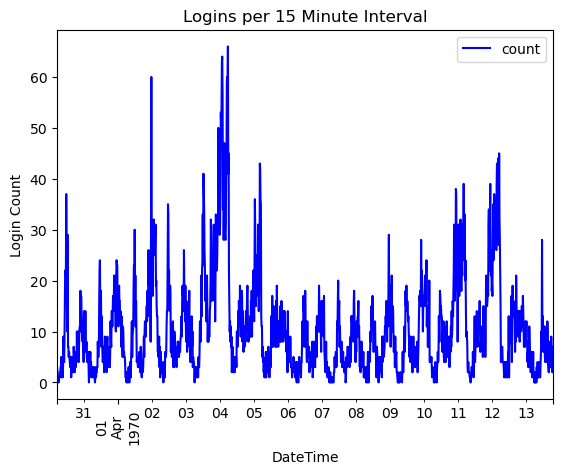

In [23]:
#We there is some consistent patter of peaks lets take a closer look at a 2 week period that would be about 1400 rows of data
plt.figure(figsize=(20, 6))
logins_15min_int.tail(1400).plot(x='login_time', y='count', kind='line', color='blue')
plt.title('Logins per 15 Minute Interval')
plt.xlabel('DateTime')
plt.ylabel('Login Count')
plt.xticks(rotation=90)
plt.show()

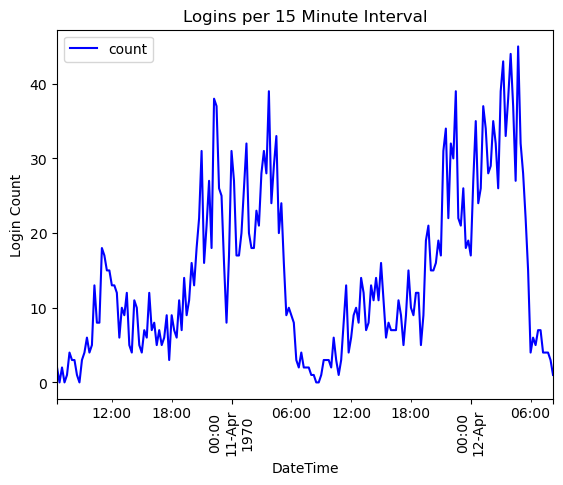

In [26]:
#OK there are broad peaks occurring on Saturday and sunday consistently.
#We can take a closer look at the time of day:

logins_15min_int.iloc[9450:9650].plot(x='login_time', y='count', kind='line', color='blue')
plt.title('Logins per 15 Minute Interval')
plt.xlabel('DateTime')
plt.ylabel('Login Count')
plt.xticks(rotation=90)
plt.show()


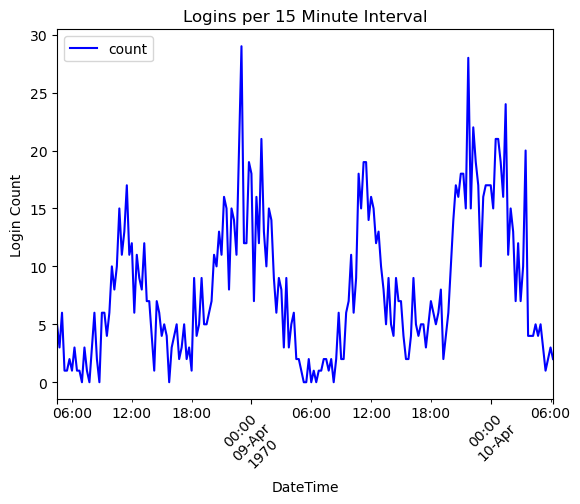

In [28]:
#Logins on the weekend appear to be the highest between 7pm and 5am
#Lets contrast that with weekdays:


logins_15min_int.iloc[9250:9450].plot(x='login_time', y='count', kind='line', color='blue')
plt.title('Logins per 15 Minute Interval')
plt.xlabel('DateTime')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
The weekdays have a similar login shape although there is a steady increase between 6pm and 12am 
and then a steady drop between 12am and 6am.

Here are some things we can do at this stage to better understand the data:
1. We can smooth the data such as taking a 1 hour moving average.
2. We can isolate weekends from week days and look for trends over time
   looking at week days separate from weekends. Alternatively, we can
   consider each day of the week separately. 
3. We want a sense of the logins by time of day and is there a dependence on the day of the week


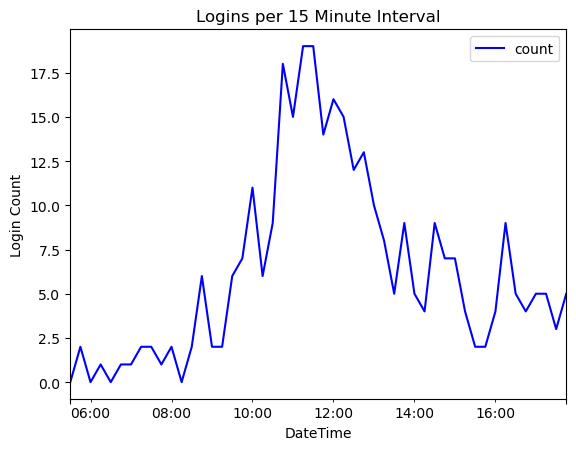

In [31]:
logins_15min_int.iloc[9350:9400].plot(x='login_time', y='count', kind='line', color='blue')
plt.title('Logins per 15 Minute Interval')
plt.xlabel('DateTime')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.show()

In [34]:
#This pattern of logins being the highest between 7pm and 5am is consistent during the week.
#Although there is a second peak that is smaller between 10am and 2pm 
#Although we need to look at other periods of time 



<Axes: title={'center': 'Logins by Data of the Week for Entire Data Range'}, xlabel='day_Name'>

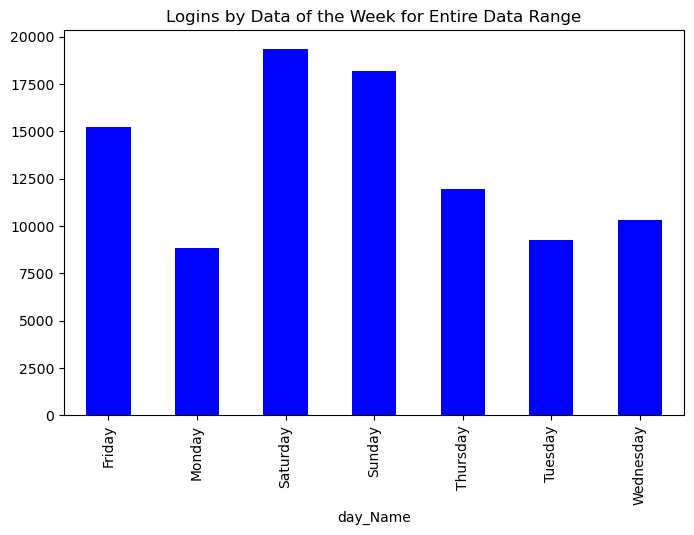

In [36]:
#Lets add the days of the week as a new column to our existing dataframe
logins_15min_int["day_Name"] = pd.to_datetime(logins_15min_int.iloc[:, 0]).dt.day_name()

fig, ax1 = plt.subplots(figsize=(8, 5))
plt.title("Logins by Data of the Week for Entire Data Range")

Totals_by_day_of_week = logins_15min_int.groupby('day_Name')['count'].sum()

Totals_by_day_of_week.plot(kind='bar', color='blue')




In [ ]:

# Ok so basically there is increaseing daily logins in going from Monday to 
# then peaking at Saturday and then a small decrease on Sunday.


In [ ]:
#Lets add a 1 hour moving average for the logins to smooth the data a little and 
#Then lets look at the login activity for each day of the week individaully as a time series for that day
#Finally lets get a sense of the login activity for the time of day to get a sense if they are changing 
#This might be accomplished by simply overlapping the 15 minute intervals or the 1 hour moving average in 15 minute intervals
#We can create a trendline as well

In [38]:
print(logins_15min_int.head())

           login_time  count  day_Name
0 1970-01-01 20:00:00      2  Thursday
1 1970-01-01 20:15:00      6  Thursday
2 1970-01-01 20:30:00      9  Thursday
3 1970-01-01 20:45:00      7  Thursday
4 1970-01-01 21:00:00      1  Thursday


In [40]:
#Add the 1 hour moving average

#for i in range logins_15min_int.loc('counts')(3, 9788, 1):\

#Generate a new column
logins_15min_int['1_hour_moving_average'] = 0

for i in range(3, len(logins_15min_int)):
    logins_15min_int.iloc[i, 3] = (logins_15min_int.iloc[i, 1] + logins_15min_int.iloc[i-1, 1] + logins_15min_int.iloc[i-2, 1] + logins_15min_int.iloc[i-3, 1])/4

In [42]:
logins_15min_int.dtypes

login_time               datetime64[ns]
count                             int64
day_Name                         object
1_hour_moving_average           float64
dtype: object

In [44]:
print(logins_15min_int.head())

           login_time  count  day_Name  1_hour_moving_average
0 1970-01-01 20:00:00      2  Thursday                   0.00
1 1970-01-01 20:15:00      6  Thursday                   0.00
2 1970-01-01 20:30:00      9  Thursday                   0.00
3 1970-01-01 20:45:00      7  Thursday                   6.00
4 1970-01-01 21:00:00      1  Thursday                   5.75


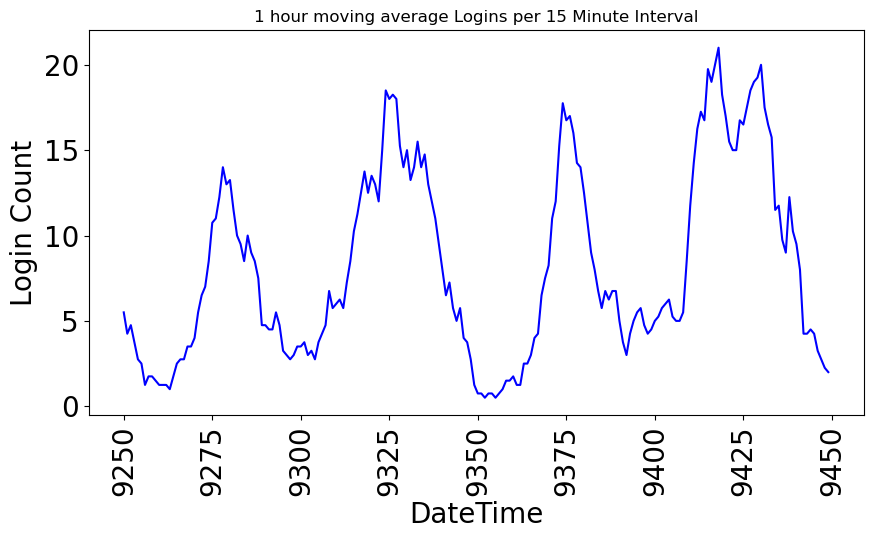

In [46]:

plt.figure(figsize=(10, 5))

logins_15min_int.iloc[9250:9450, 3].plot(x='login_time', y='count', kind='line', color='blue')
plt.title('1 hour moving average Logins per 15 Minute Interval')
plt.xlabel('DateTime', fontsize=20)
plt.ylabel('Login Count', fontsize=20)

plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()


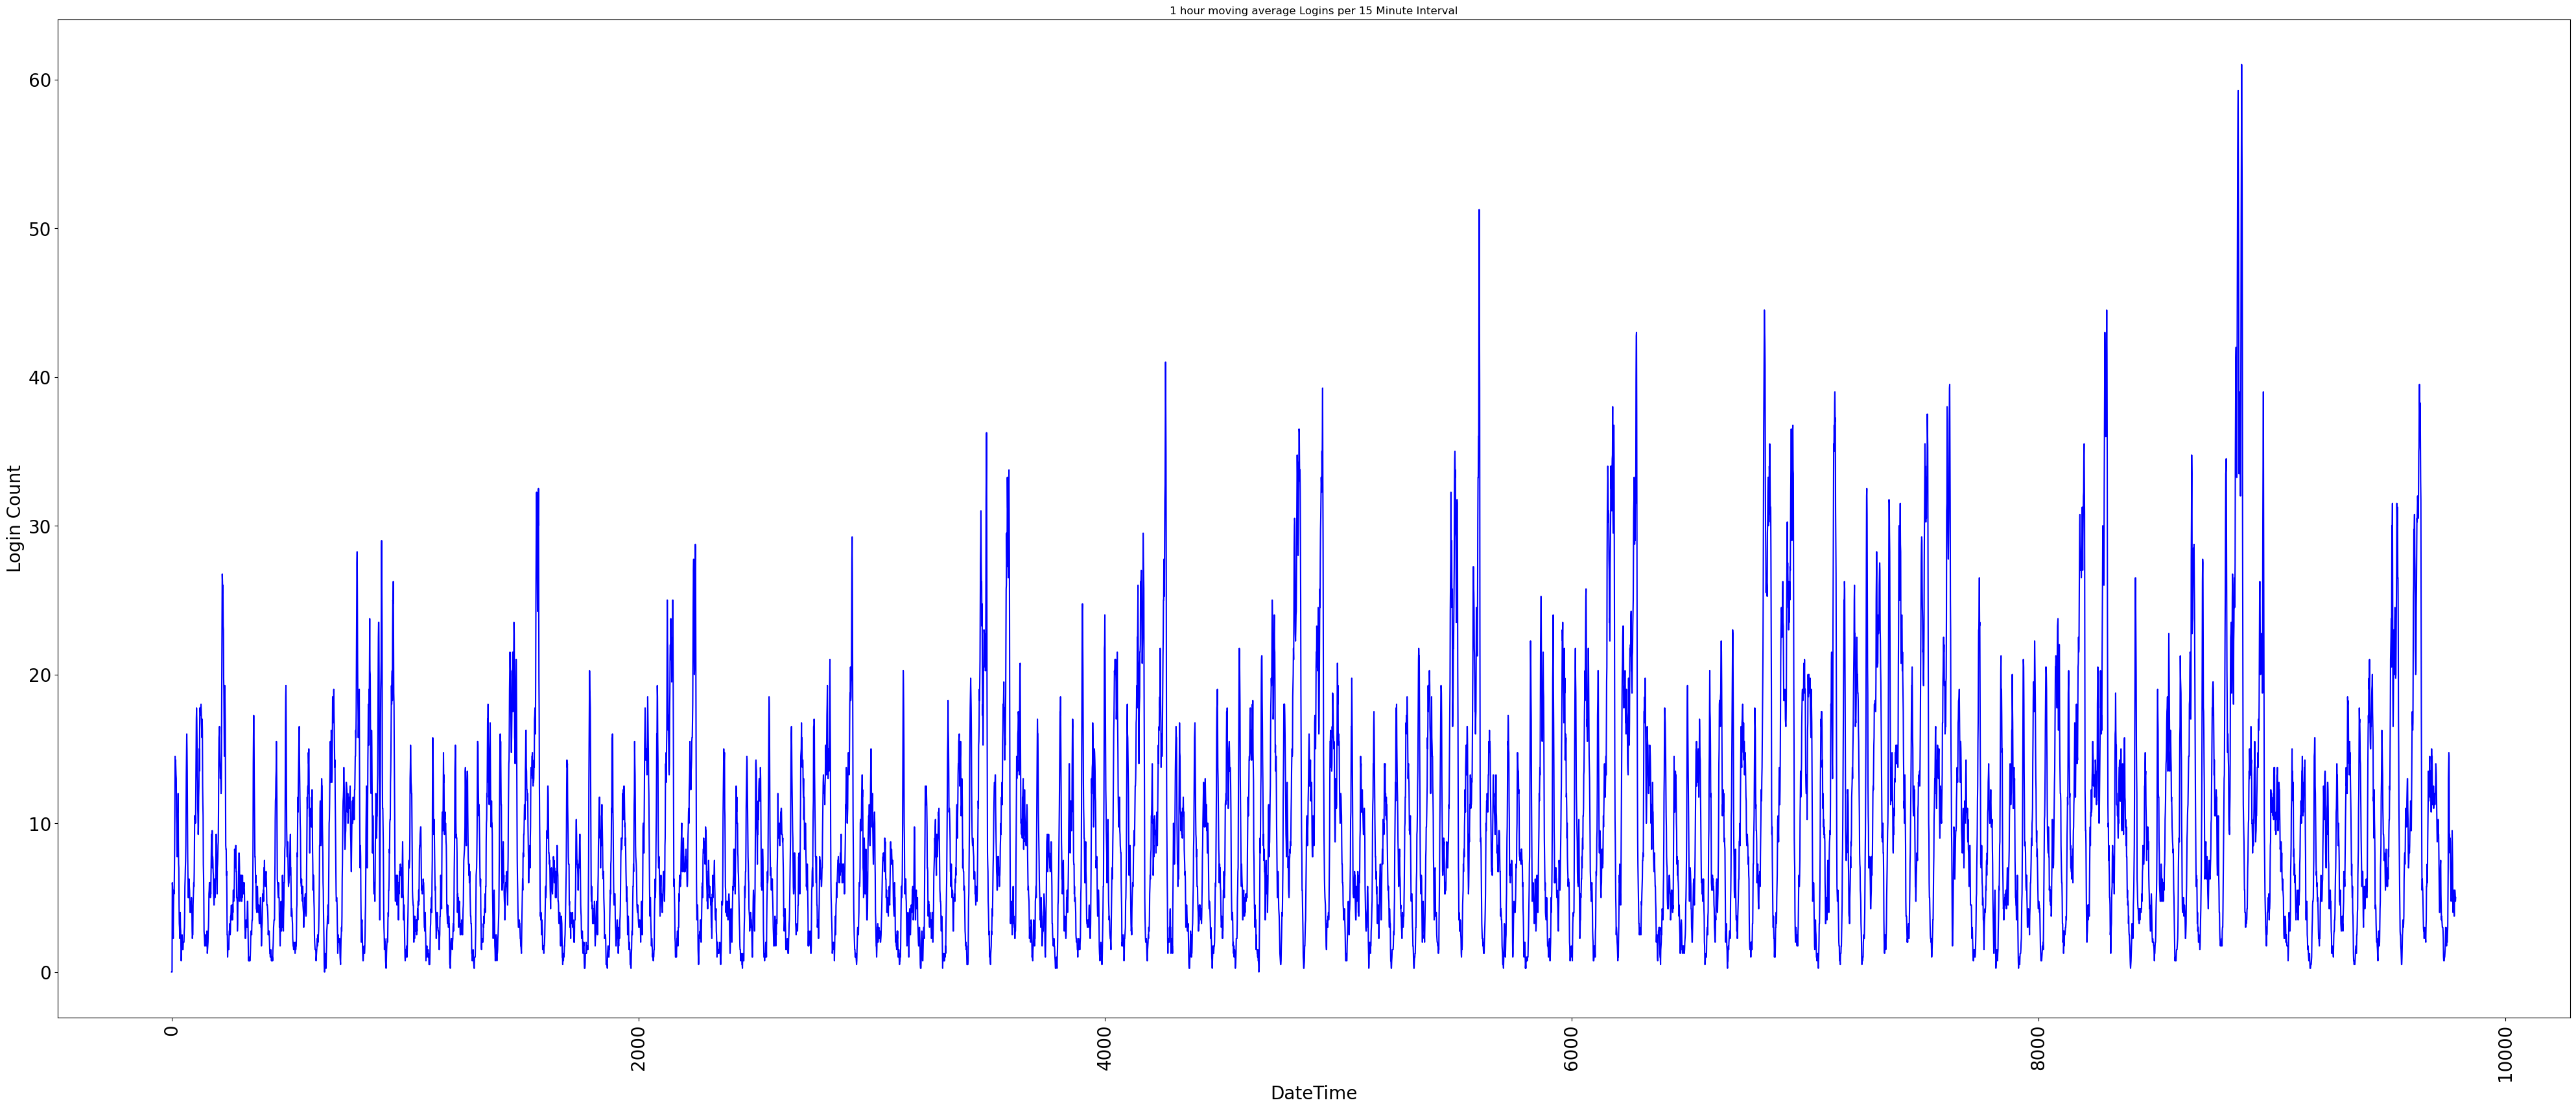

In [48]:
plt.figure(figsize=(50, 20))
logins_15min_int.iloc[:,3].plot(x='login_time', y='count', kind='line', color='blue')
plt.title('1 hour moving average Logins per 15 Minute Interval')
plt.xlabel('DateTime', fontsize=20)
plt.ylabel('Login Count', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#It appears that logins are increasing over time and that weekend logins are increasing at a greater rate than weekday logins
#Also the breadth of the time ranges with a visibly increasing number of logins for the 1 hour moving average appear to be increasing over time for that day of the week.
#Lets take a close look at the individual days and confirm this information

In [50]:
#Lets First Create Seaparate Dataframs for each day:

Monday_df = logins_15min_int[logins_15min_int['day_Name'] == 'Monday'].copy()
Tuesday_df = logins_15min_int[logins_15min_int['day_Name'] == 'Tuesday'].copy()
Wednesday_df = logins_15min_int[logins_15min_int['day_Name'] == 'Wednesday'].copy()
Thursday_df = logins_15min_int[logins_15min_int['day_Name'] == 'Thursday'].copy()
Friday_df = logins_15min_int[logins_15min_int['day_Name'] == 'Friday'].copy()
Saturday_df = logins_15min_int[logins_15min_int['day_Name'] == 'Saturday'].copy()
Sunday_df = logins_15min_int[logins_15min_int['day_Name'] == 'Sunday'].copy()




        

In [52]:
Monday_df.head()

login_time  count day_Name  1_hour_moving_average
304 1970-01-05 00:00:00      8   Monday                   6.50
305 1970-01-05 00:15:00      3   Monday                   5.50
306 1970-01-05 00:30:00      7   Monday                   6.00
307 1970-01-05 00:45:00      4   Monday                   5.50
308 1970-01-05 01:00:00      7   Monday                   5.25

In [ ]:
#This appears to have worked but we have a little issue with the datetime indexing

In [54]:
#Now lets reset the index to insure our datetime is a column not an index:
Monday_df = Monday_df.reset_index()
Tuesday_df = Tuesday_df.reset_index()
Wednesday_df = Wednesday_df.reset_index()
Thursday_df = Thursday_df.reset_index()
Friday_df = Friday_df.reset_index()
Saturday_df = Saturday_df.reset_index()
Sunday_df = Sunday_df.reset_index()

In [56]:
Monday_df['date'] = pd.to_datetime(Monday_df['login_time']).dt.date
Tuesday_df['date'] = pd.to_datetime(Tuesday_df['login_time']).dt.date
Wednesday_df['date'] = pd.to_datetime(Wednesday_df['login_time']).dt.date
Thursday_df['date'] = pd.to_datetime(Thursday_df['login_time']).dt.date
Friday_df['date'] = pd.to_datetime(Friday_df['login_time']).dt.date
Saturday_df['date'] = pd.to_datetime(Saturday_df['login_time']).dt.date
Sunday_df['date'] = pd.to_datetime(Sunday_df['login_time']).dt.date

In [58]:
#Now lets get the totals for each Calendar Day Separated by Day of the Week:
Monday_totals = Monday_df.groupby('date')['count'].sum().reset_index()
Tuesday_totals = Tuesday_df.groupby('date')['count'].sum().reset_index()
Wednesday_totals = Wednesday_df.groupby('date')['count'].sum().reset_index()
Thursday_totals = Thursday_df.groupby('date')['count'].sum().reset_index()
Friday_totals = Friday_df.groupby('date')['count'].sum().reset_index()
Saturday_totals = Saturday_df.groupby('date')['count'].sum().reset_index()
Sunday_totals = Sunday_df.groupby('date')['count'].sum().reset_index()

In [ ]:
#Because the first Thursday represents a partial day we will drop that day
Thursday_totals = Thursday_totals.drop(index=0)

In [60]:
logins_15min_int = logins_15min_int.reset_index()

In [62]:
logins_15min_int.head()

index          login_time  count  day_Name  1_hour_moving_average
0      0 1970-01-01 20:00:00      2  Thursday                   0.00
1      1 1970-01-01 20:15:00      6  Thursday                   0.00
2      2 1970-01-01 20:30:00      9  Thursday                   0.00
3      3 1970-01-01 20:45:00      7  Thursday                   6.00
4      4 1970-01-01 21:00:00      1  Thursday                   5.75

In [64]:
Sunday_totals.head()

date  count
0  1970-01-04    788
1  1970-01-11   1014
2  1970-01-18    971
3  1970-01-25    852
4  1970-02-01    870

<Figure size 2000x500 with 0 Axes>

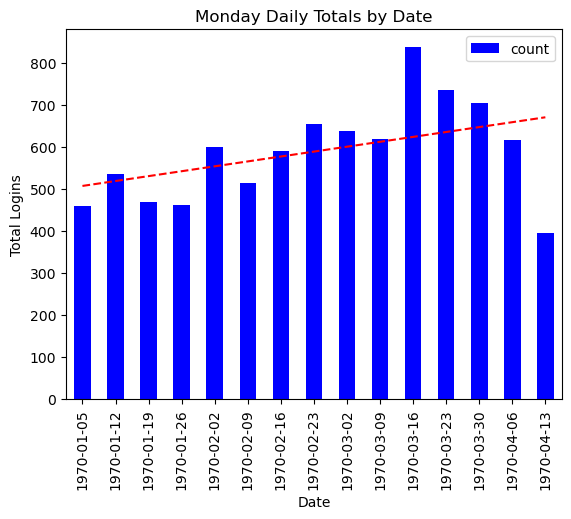

<Figure size 2000x500 with 0 Axes>

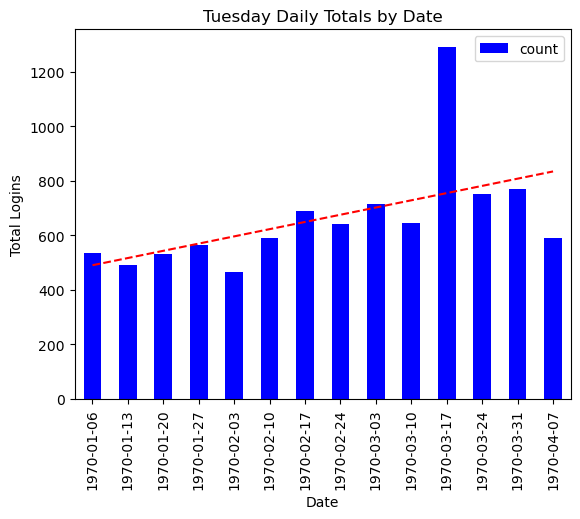

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

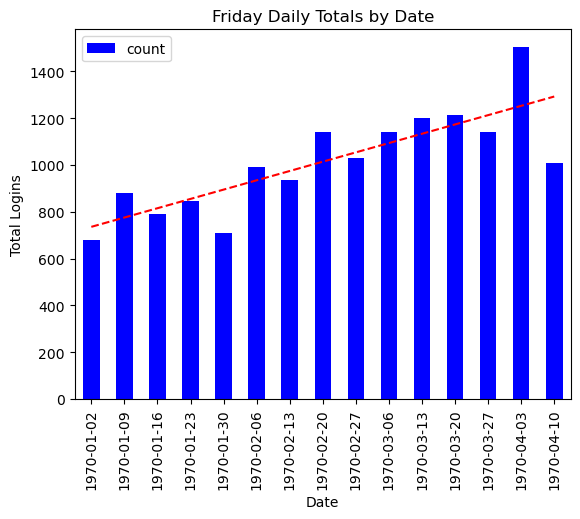

<Figure size 2000x500 with 0 Axes>

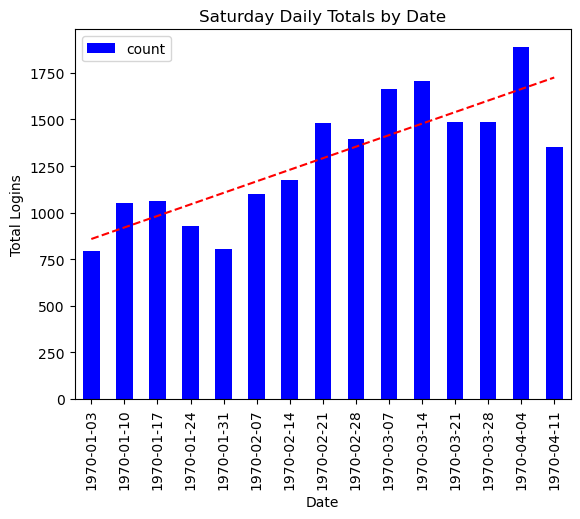

<Figure size 2000x500 with 0 Axes>

In [66]:
#OK Lets try to plot all of these as part of a for loop and add a regression line
import pylab

day_totals = {
    'Monday': Monday_totals,
    'Tuesday': Tuesday_totals,
    'Wednesday': Wednesday_totals,
    'Thursday': Thursday_totals,
    'Friday': Friday_totals,
    'Saturday': Saturday_totals,
    'Sunday': Sunday_totals
}

for day, df in day_totals.items():
    plt.figure(figsize=(20, 5))
    df.plot(x='date', y='count', kind='bar', title=f'{day} Daily Totals by Date', color='blue')
    x = range(len(df))
    y = df['count'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    pylab.plot(x,p(x),"r--")
    plt.xlabel('Date')
    plt.ylabel('Total Logins')
    plt.xticks(rotation=90)
    plt.show()


In [68]:
#OK lets get the actual slopess and y-intercepts of these values 
print("Regression Coefficients by Day of Week")
for day, df in day_totals.items():
    x = range(len(df))
    y = df['count'].values
    z = np.polyfit(x, y, 1)  
    
    slope = z[0]
    intercept = z[1]
    print(f"{day}:")
    print(f"  Slope: {slope}")
    print(f"  Intercept: {intercept}")

Regression Coefficients by Day of Week
Monday:
  Slope: 11.660714285714292
  Intercept: 506.575
Tuesday:
  Slope: 26.439560439560438
  Intercept: 490.14285714285705
Wednesday:
  Slope: 28.885714285714265
  Intercept: 550.7428571428571
Thursday:
  Slope: 48.08928571428572
  Intercept: 460.7083333333332
Friday:
  Slope: 39.77142857142856
  Intercept: 735.4666666666668
Saturday:
  Slope: 61.90000000000001
  Intercept: 858.4999999999999
Sunday:
  Slope: 46.553571428571445
  Intercept: 885.2583333333334


In [70]:
Monday_df.head()

index          login_time  count day_Name  1_hour_moving_average  \
0    304 1970-01-05 00:00:00      8   Monday                   6.50   
1    305 1970-01-05 00:15:00      3   Monday                   5.50   
2    306 1970-01-05 00:30:00      7   Monday                   6.00   
3    307 1970-01-05 00:45:00      4   Monday                   5.50   
4    308 1970-01-05 01:00:00      7   Monday                   5.25   

         date  
0  1970-01-05  
1  1970-01-05  
2  1970-01-05  
3  1970-01-05  
4  1970-01-05

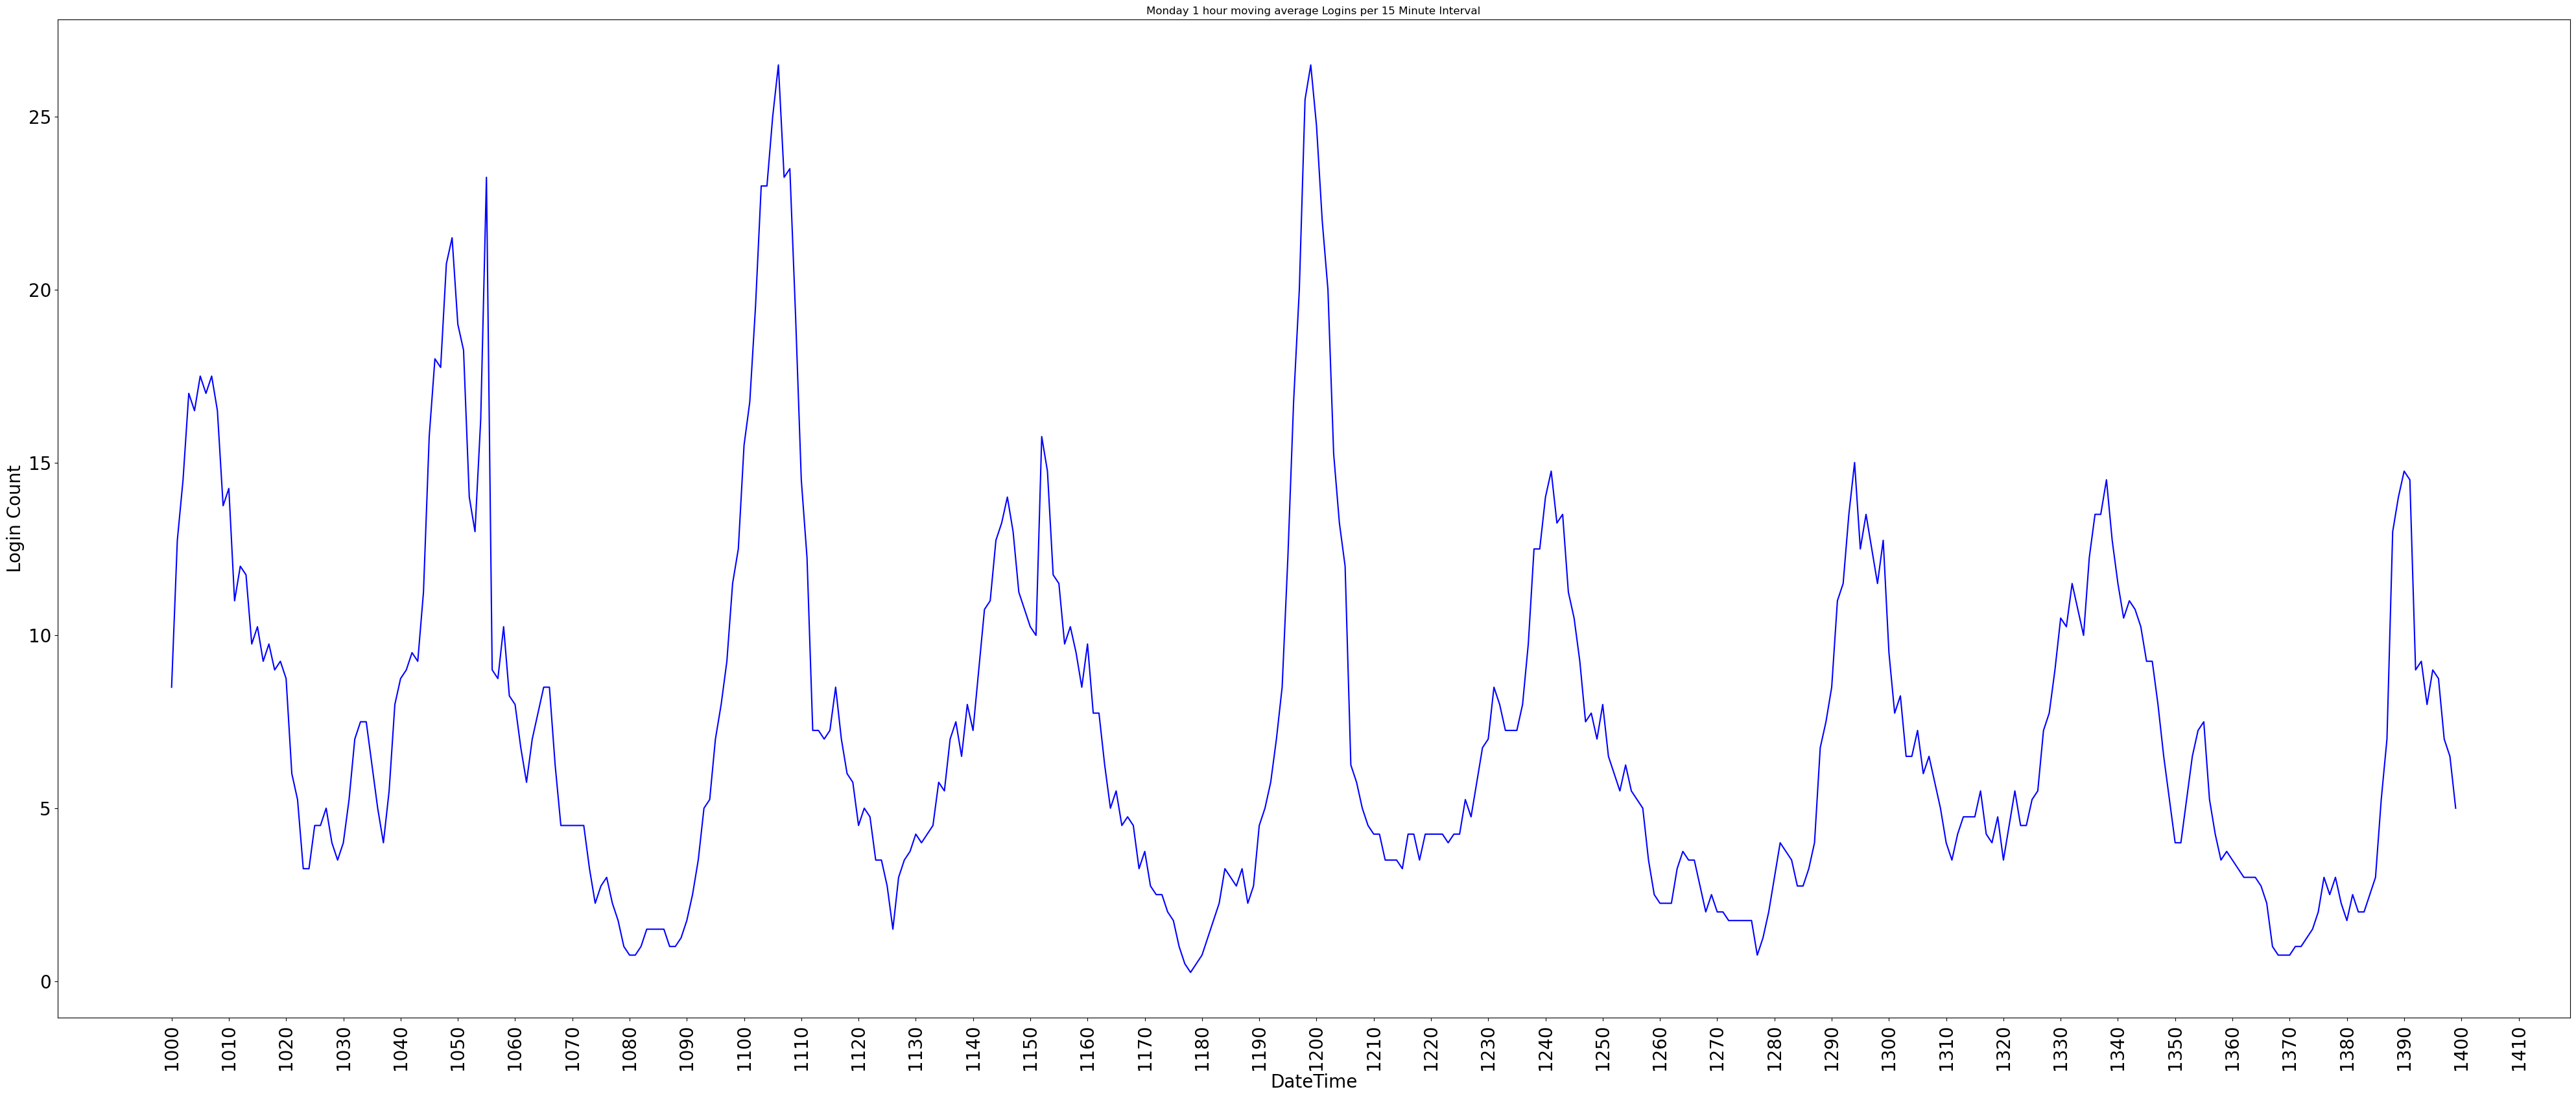

In [116]:
#OK we have looked at things on a dialy basis but we need to do two further things:
#First we must get a sense of the login patterns by time of day


plt.figure(figsize=(50, 20))
Monday_df.iloc[1000:1400, 4].plot(x='login_time', y='count', kind='line', color='blue')
plt.title('Monday 1 hour moving average Logins per 15 Minute Interval')
plt.xlabel('DateTime', fontsize=20)
plt.ylabel('Login Count', fontsize=20)
plt.xticks(range(1000, len(Monday_df), 10), rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)
plt.show()

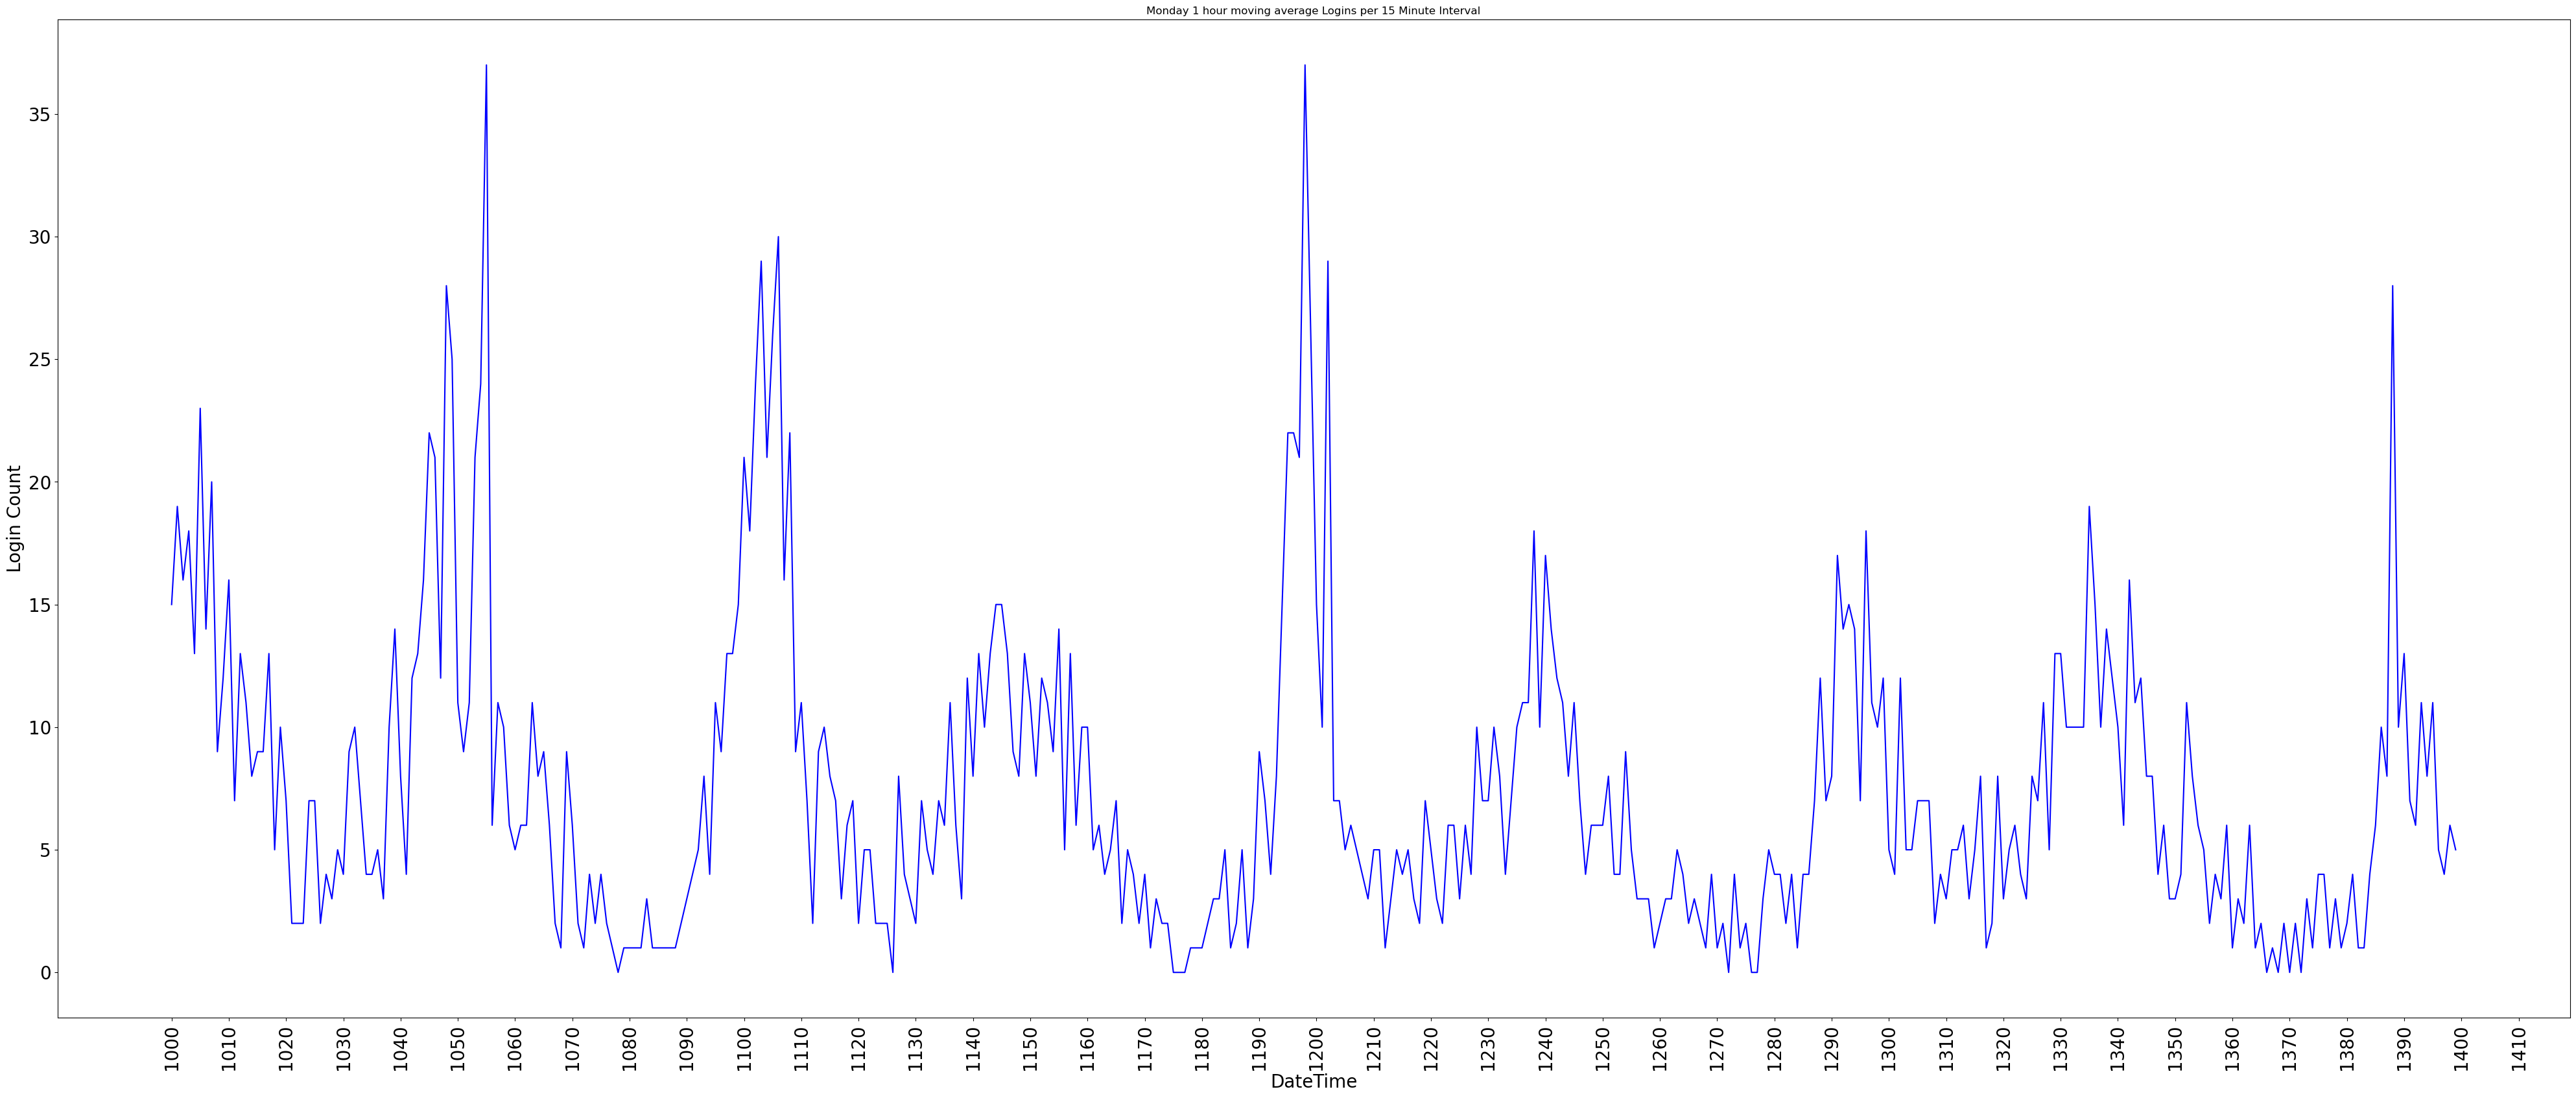

In [118]:
#OK After taking a second look at things the 1-hour moving average is not really helpful 

plt.figure(figsize=(50, 20))
Monday_df.iloc[1000:1400, 2].plot(x='login_time', y='count', kind='line', color='blue')
plt.title('Monday 1 hour moving average Logins per 15 Minute Interval')
plt.xlabel('DateTime', fontsize=20)
plt.ylabel('Login Count', fontsize=20)
plt.xticks(range(1000, len(Monday_df), 10), rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)
plt.show()

<Figure size 5000x2000 with 0 Axes>

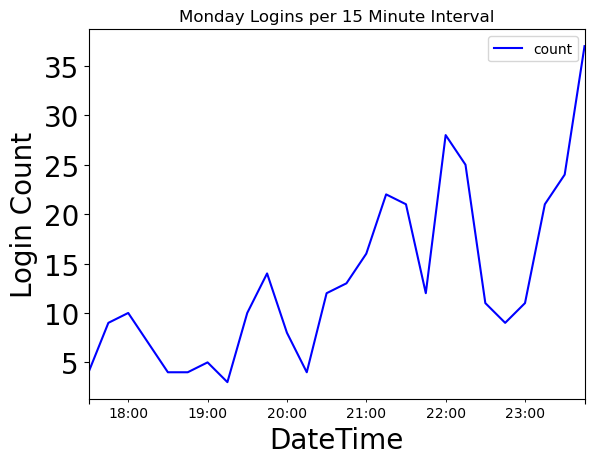

In [136]:
plt.figure(figsize=(50, 20))
Monday_df.iloc[1030:1056].plot(x='login_time', y='count', kind='line', color='blue')
plt.title('Monday Logins per 15 Minute Interval')
plt.xlabel('DateTime', fontsize=20)
plt.ylabel('Login Count', fontsize=20)
#plt.xticks(range(1000, len(Monday_df), 10), rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)
plt.show()

<Figure size 5000x2000 with 0 Axes>

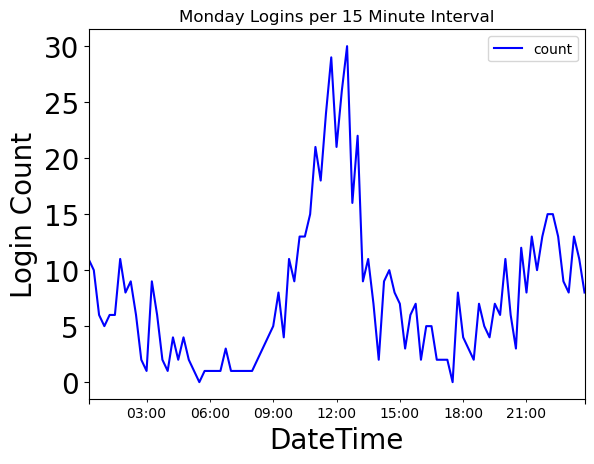

In [140]:
plt.figure(figsize=(50, 20))
Monday_df.iloc[1057:1152].plot(x='login_time', y='count', kind='line', color='blue')
plt.title('Monday Logins per 15 Minute Interval')
plt.xlabel('DateTime', fontsize=20)
plt.ylabel('Login Count', fontsize=20)
#plt.xticks(range(1000, len(Monday_df), 10), rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [152]:
#OK we are running into this challenge not shown where plotting the data times for an individual day is attempting to insert the other days of the week
#to overcome this challenge we will generate a new column datetime_string that is just the text of the date time so we can see the dates for a large range

Monday_df['datetime_string'] = Monday_df['login_time'].dt.strftime('%Y-%m-%d %H:%M')
Tuesday_df['datetime_string'] = Tuesday_df['login_time'].dt.strftime('%Y-%m-%d %H:%M')
Wednesday_df['datetime_string'] = Wednesday_df['login_time'].dt.strftime('%Y-%m-%d %H:%M')
Thursday_df['datetime_string'] = Thursday_df['login_time'].dt.strftime('%Y-%m-%d %H:%M')
Friday_df['datetime_string'] = Friday_df['login_time'].dt.strftime('%Y-%m-%d %H:%M')
Saturday_df['datetime_string'] = Saturday_df['login_time'].dt.strftime('%Y-%m-%d %H:%M')
Sunday_df['datetime_string'] = Sunday_df['login_time'].dt.strftime('%Y-%m-%d %H:%M')




In [144]:
Monday_df.head()

index          login_time  count day_Name  1_hour_moving_average  \
0    304 1970-01-05 00:00:00      8   Monday                   6.50   
1    305 1970-01-05 00:15:00      3   Monday                   5.50   
2    306 1970-01-05 00:30:00      7   Monday                   6.00   
3    307 1970-01-05 00:45:00      4   Monday                   5.50   
4    308 1970-01-05 01:00:00      7   Monday                   5.25   

         date   datetime_string  
0  1970-01-05  1970-01-05 00:00  
1  1970-01-05  1970-01-05 00:15  
2  1970-01-05  1970-01-05 00:30  
3  1970-01-05  1970-01-05 00:45  
4  1970-01-05  1970-01-05 01:00

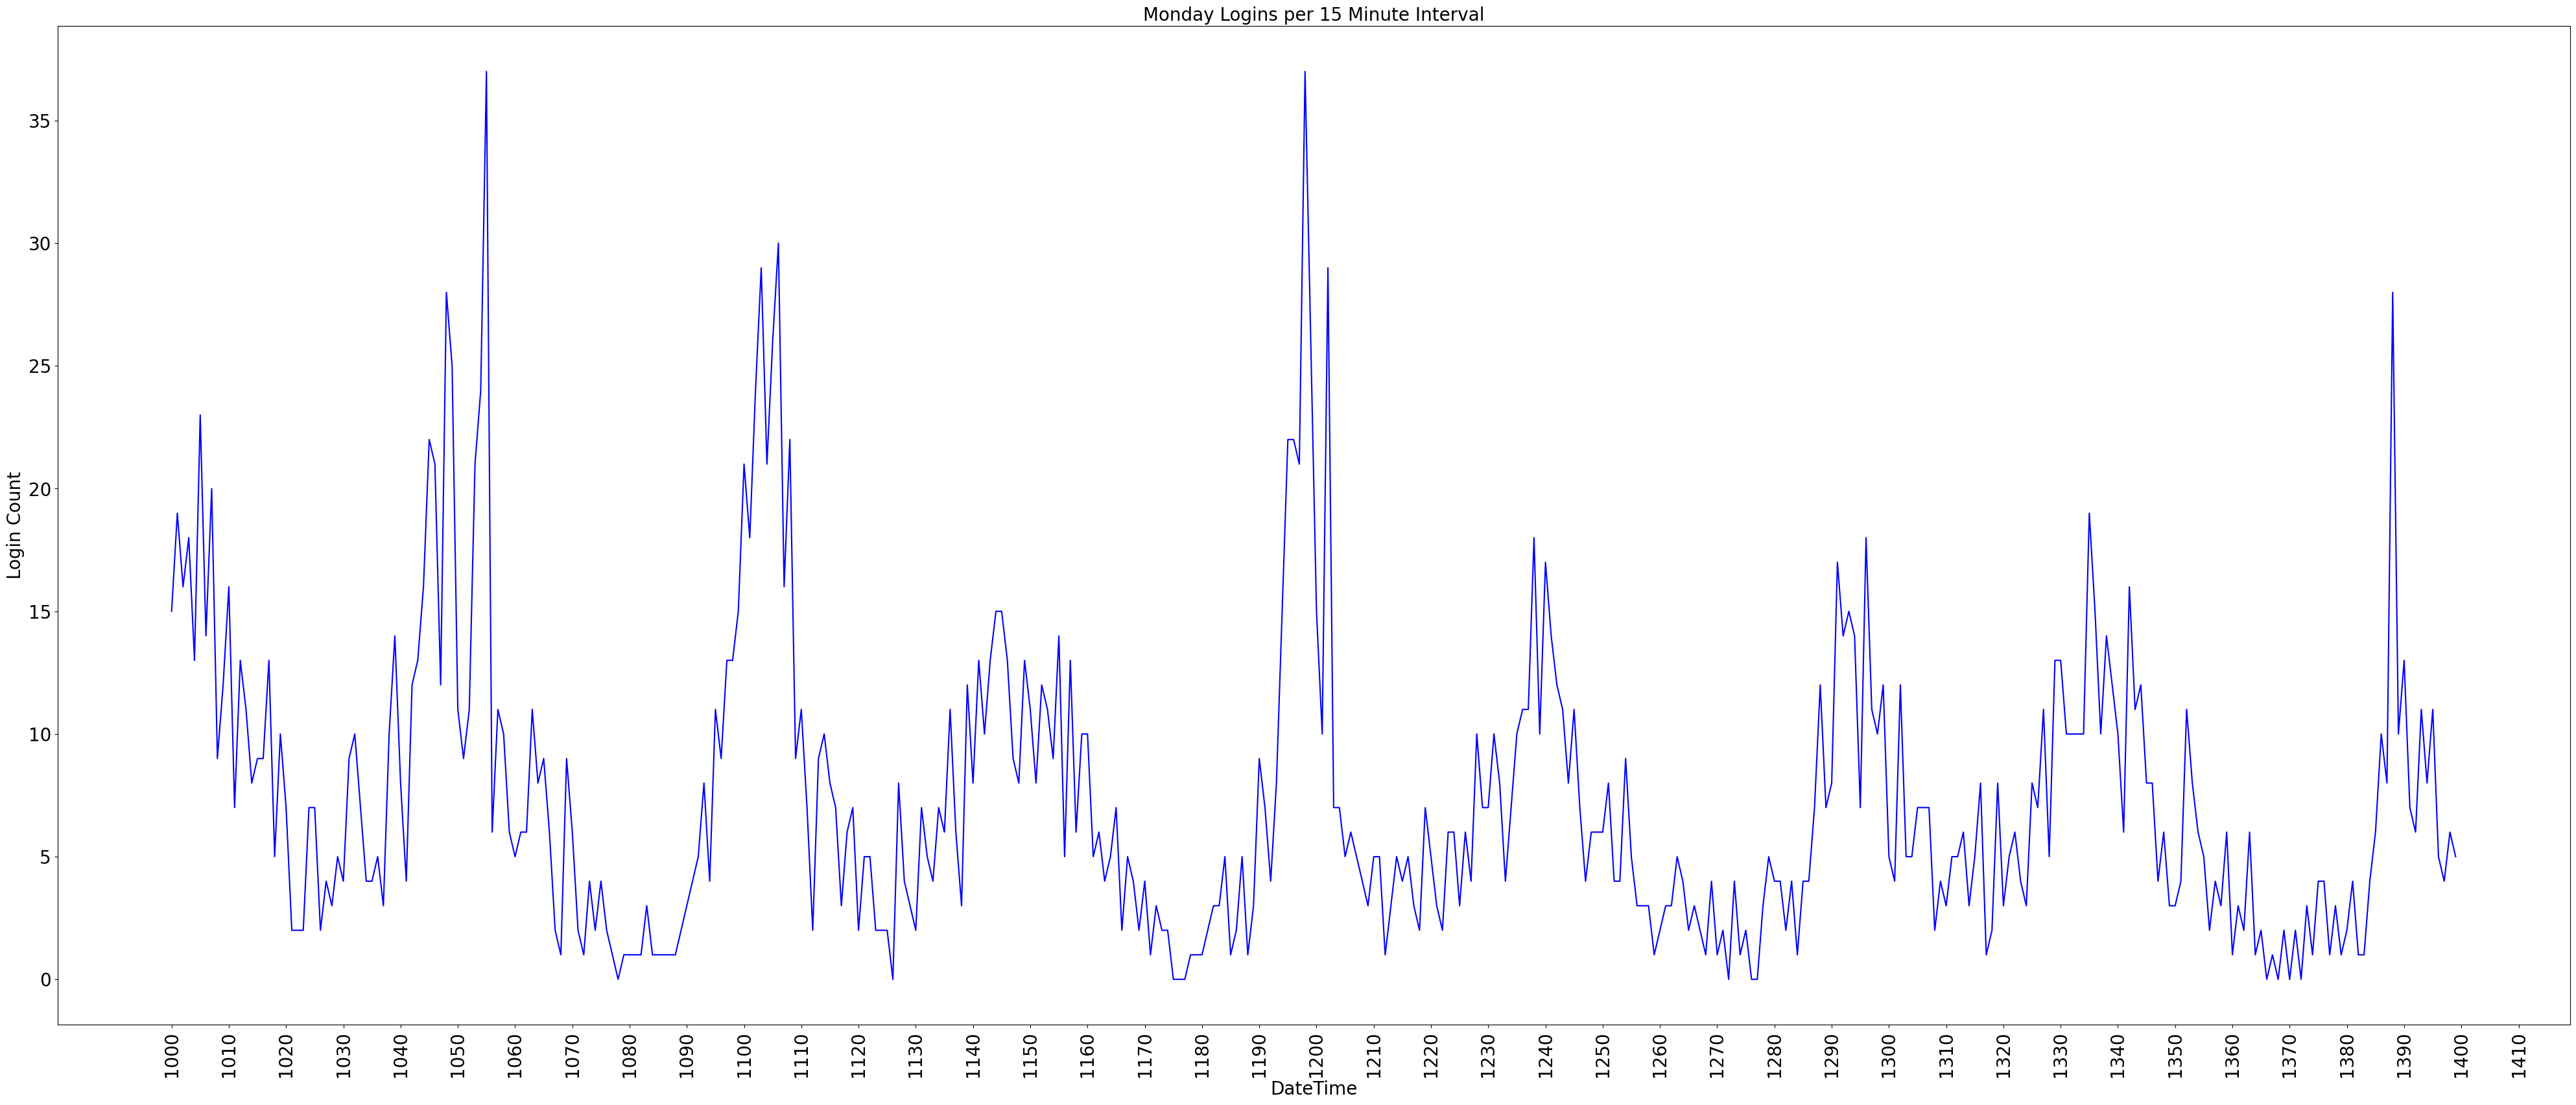

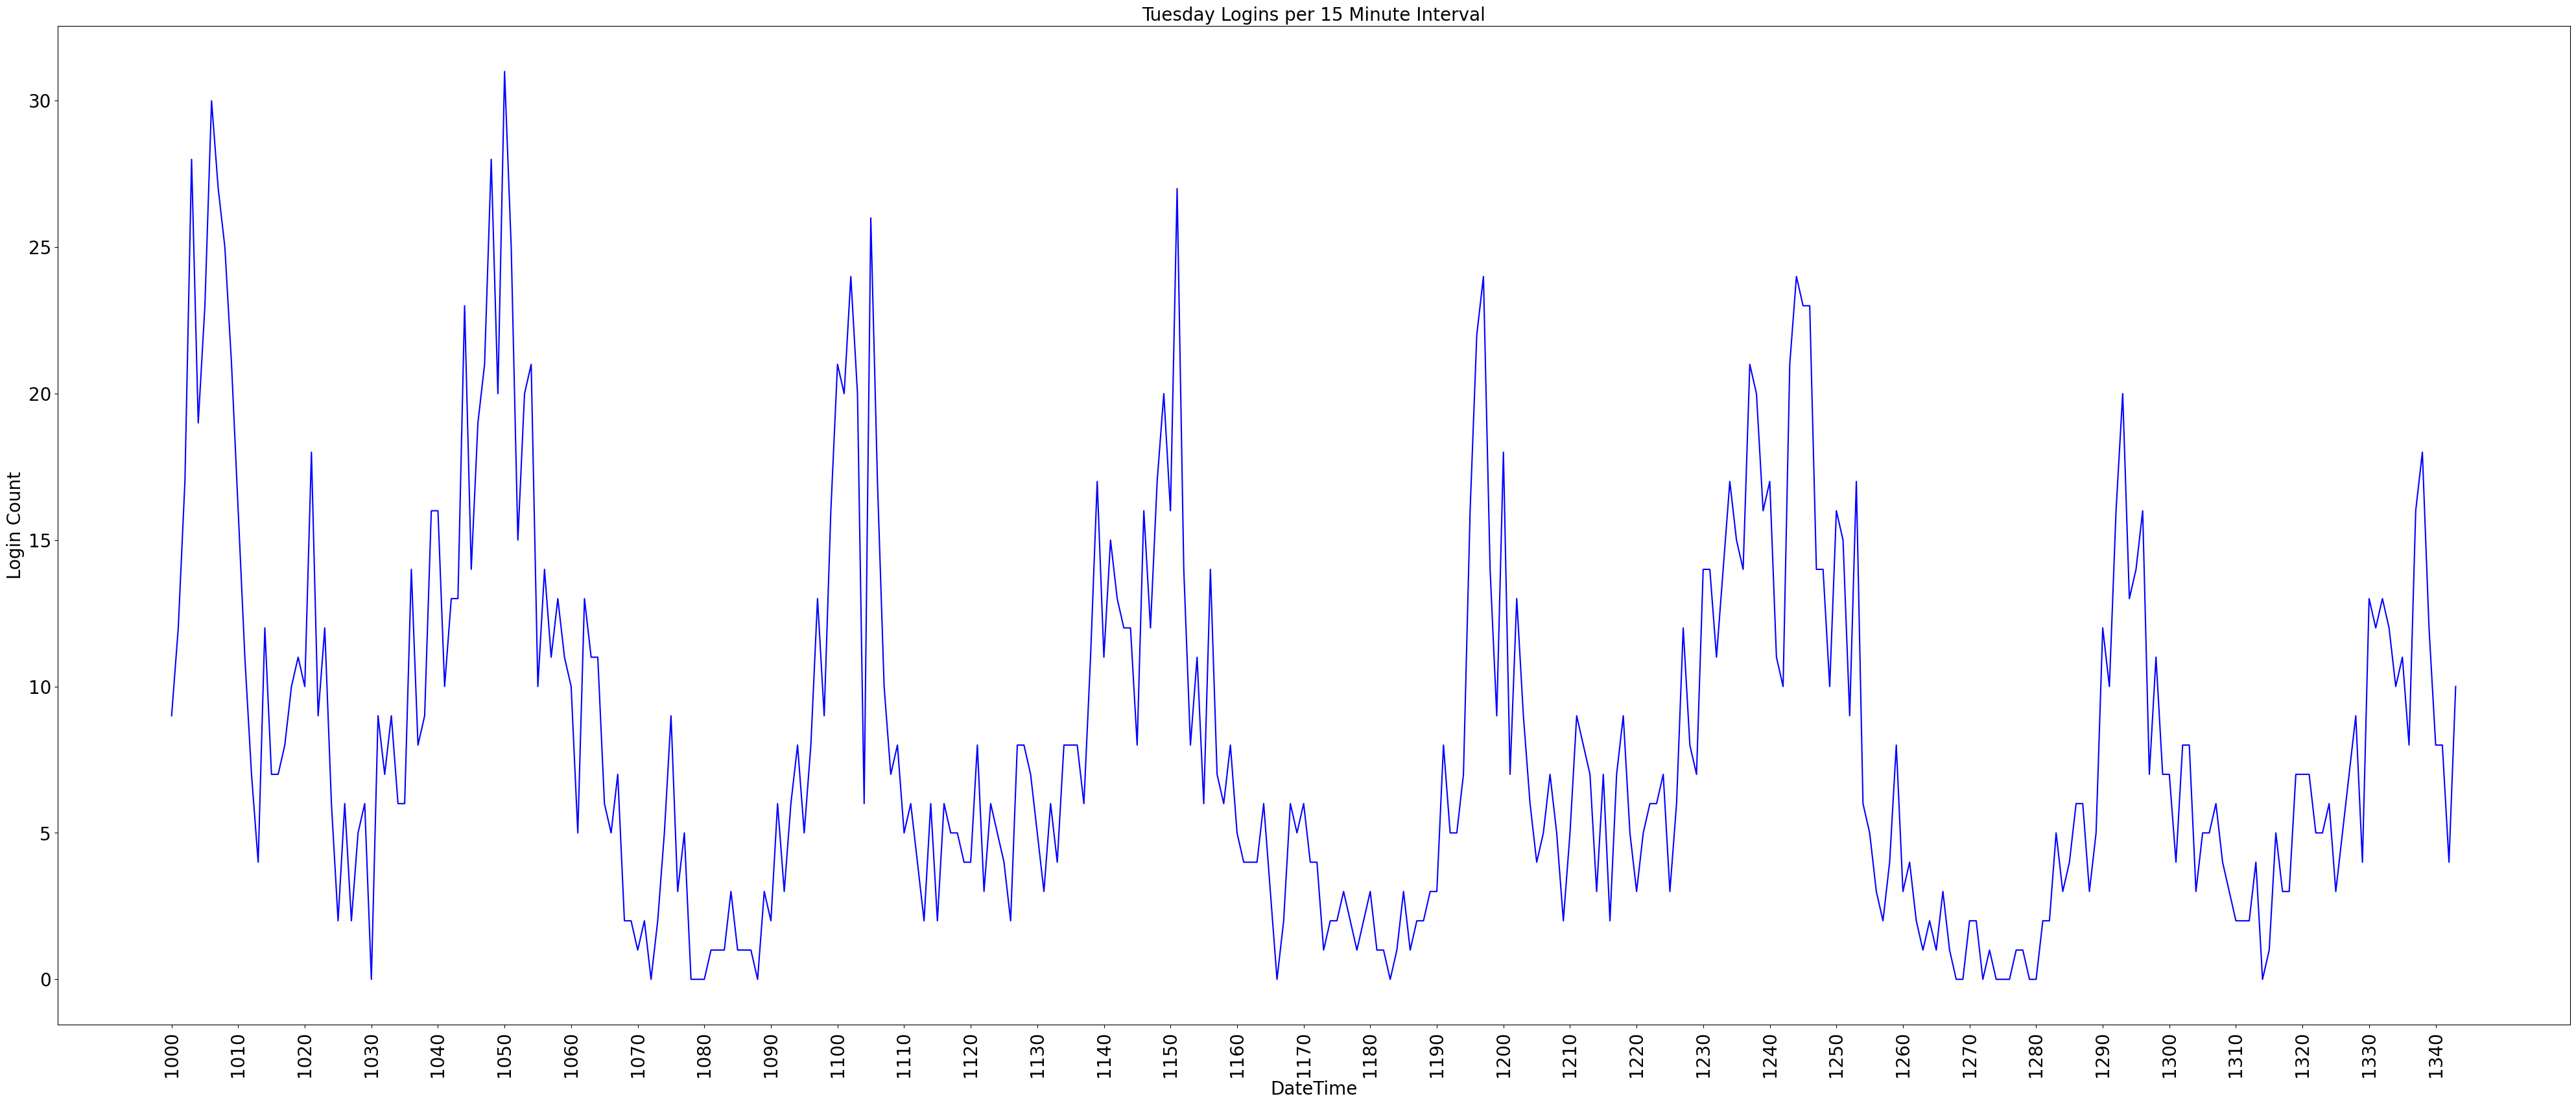

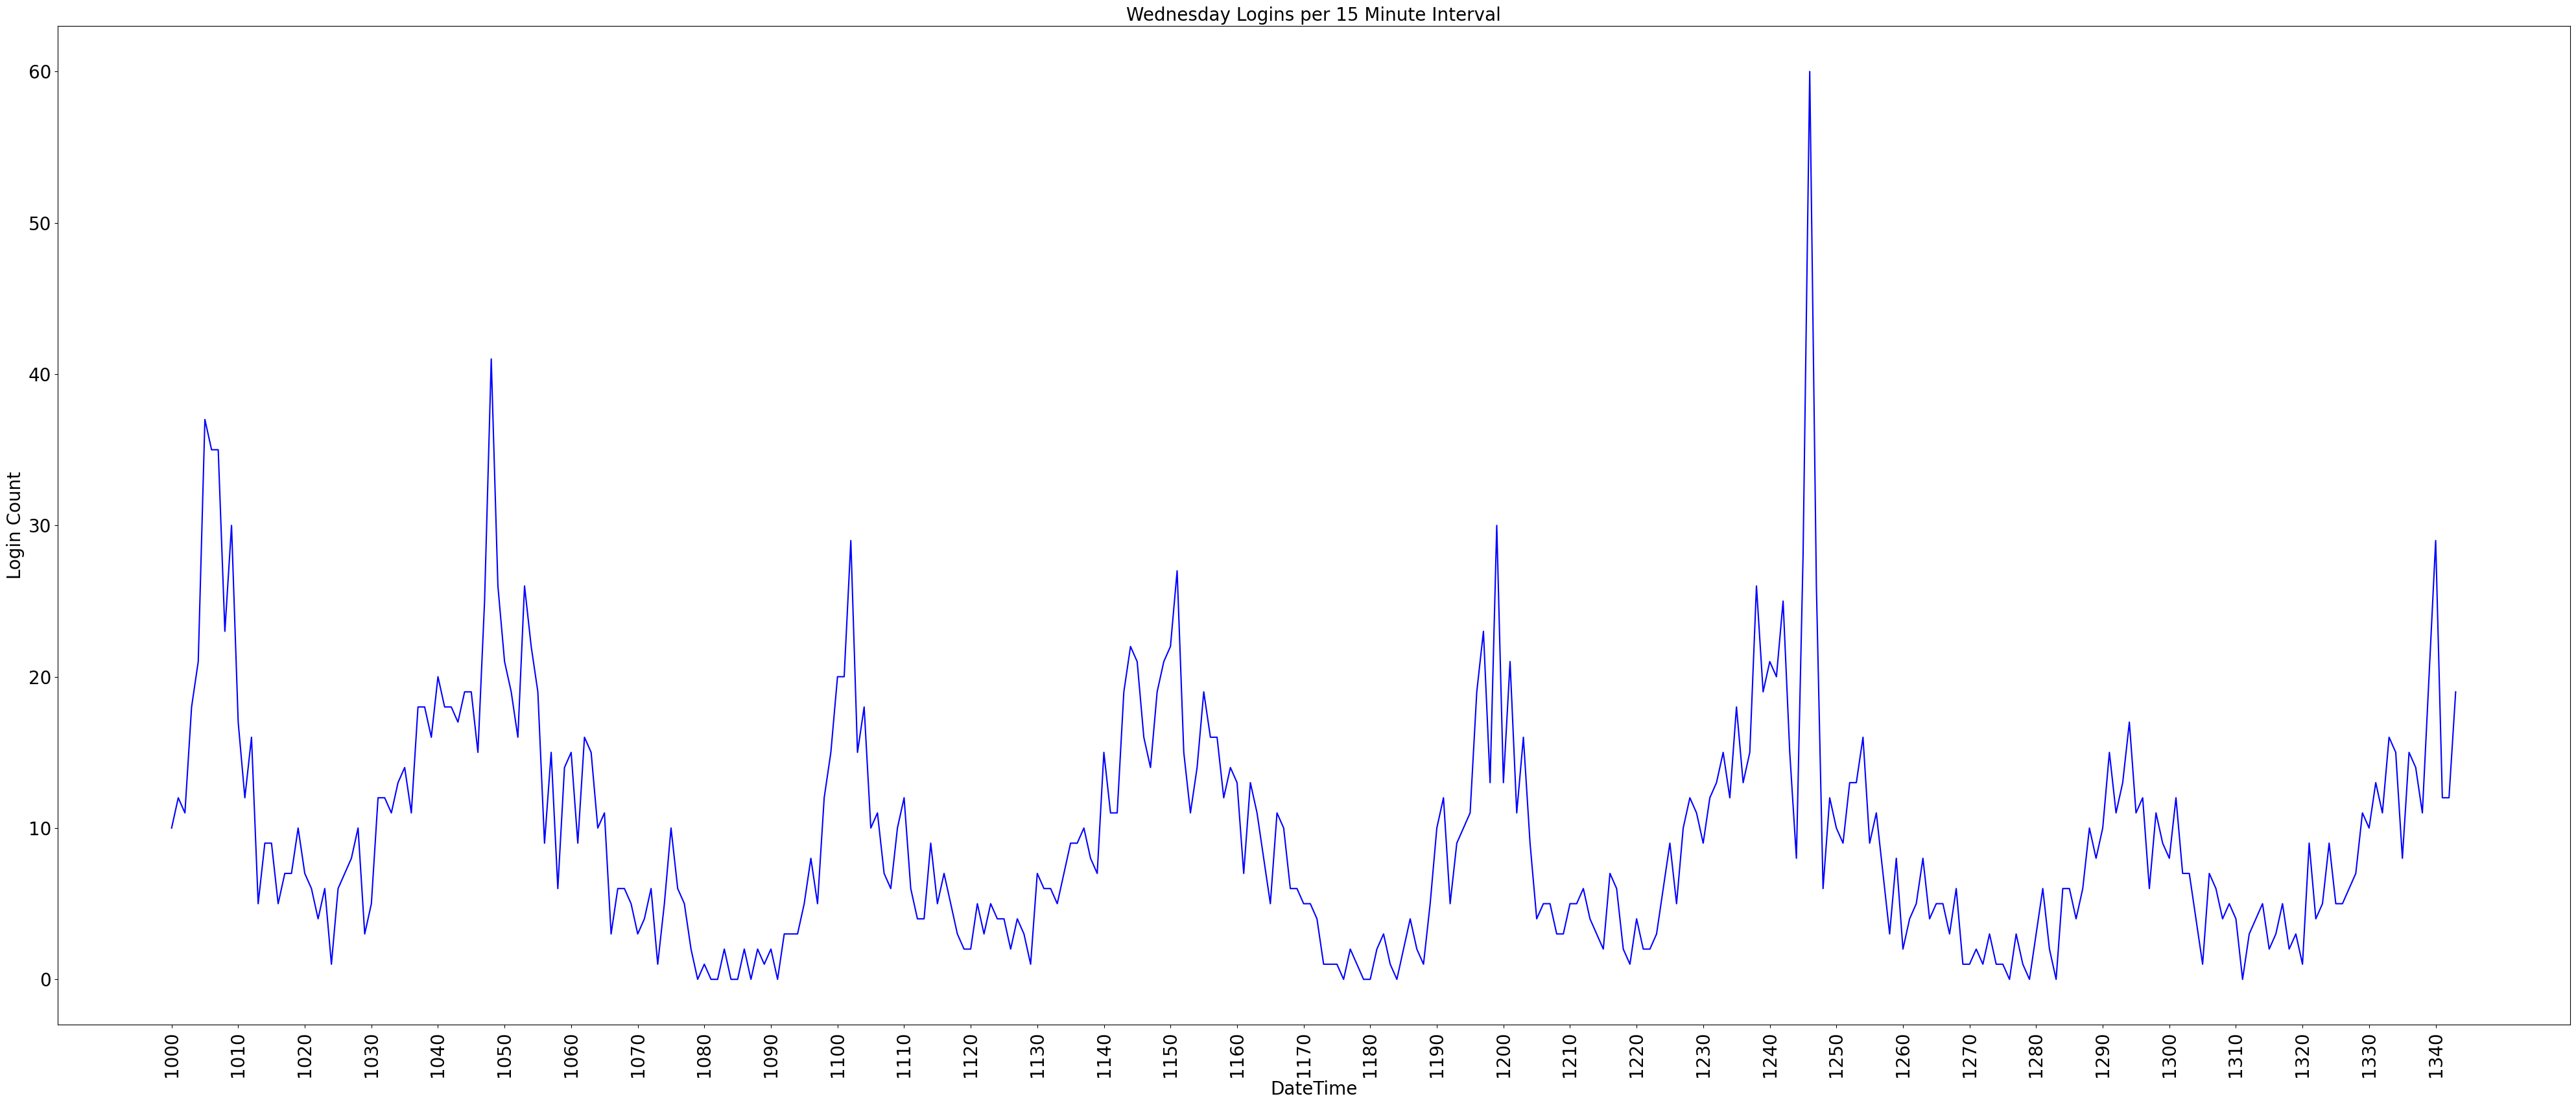

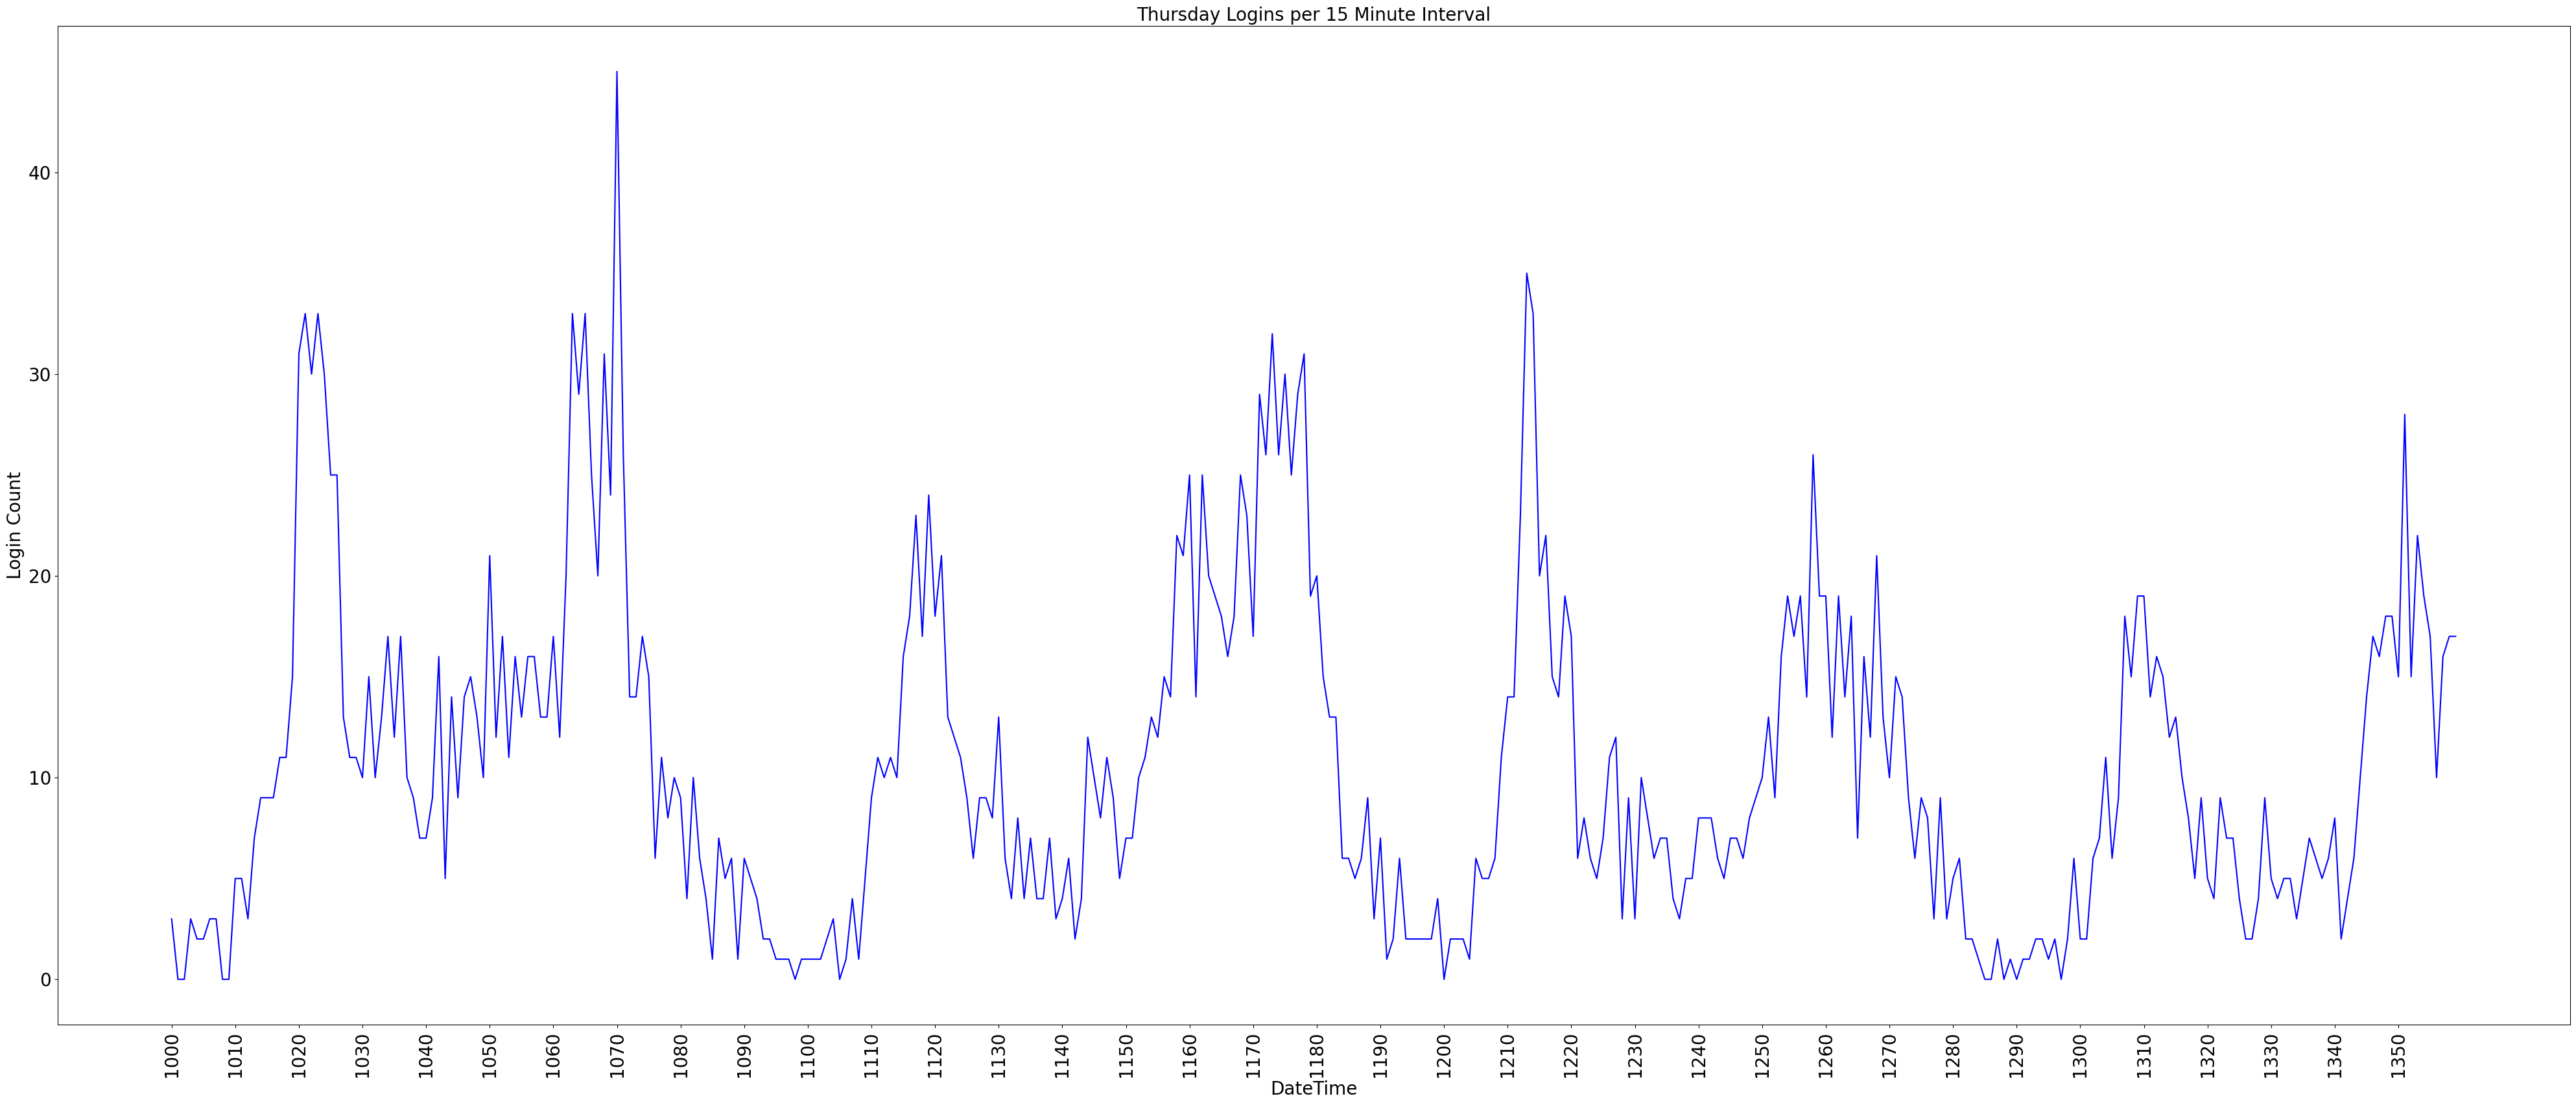

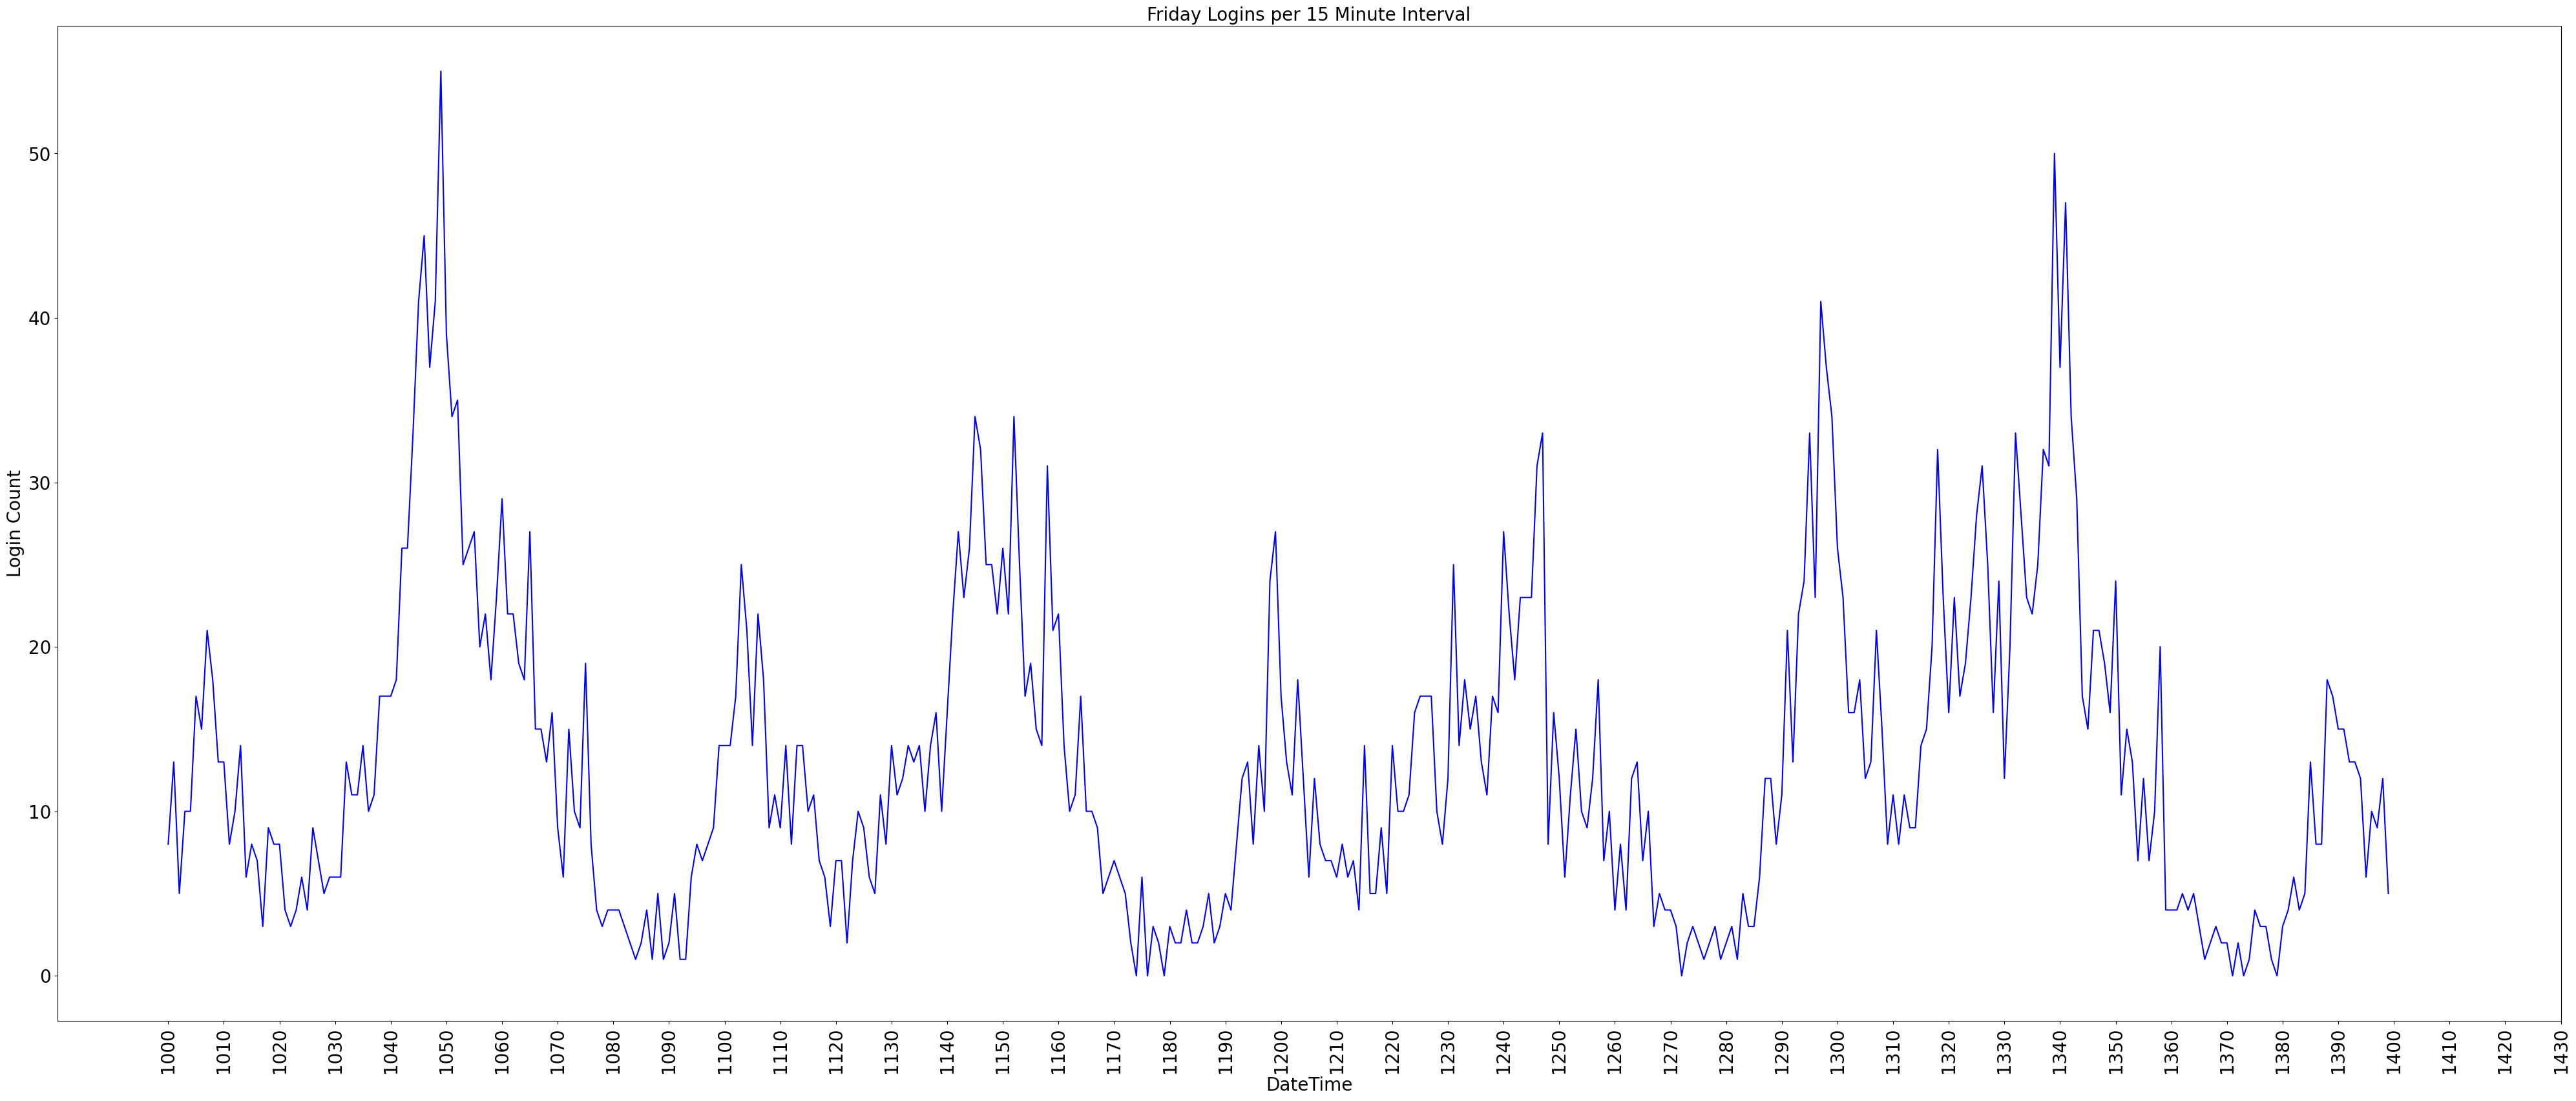

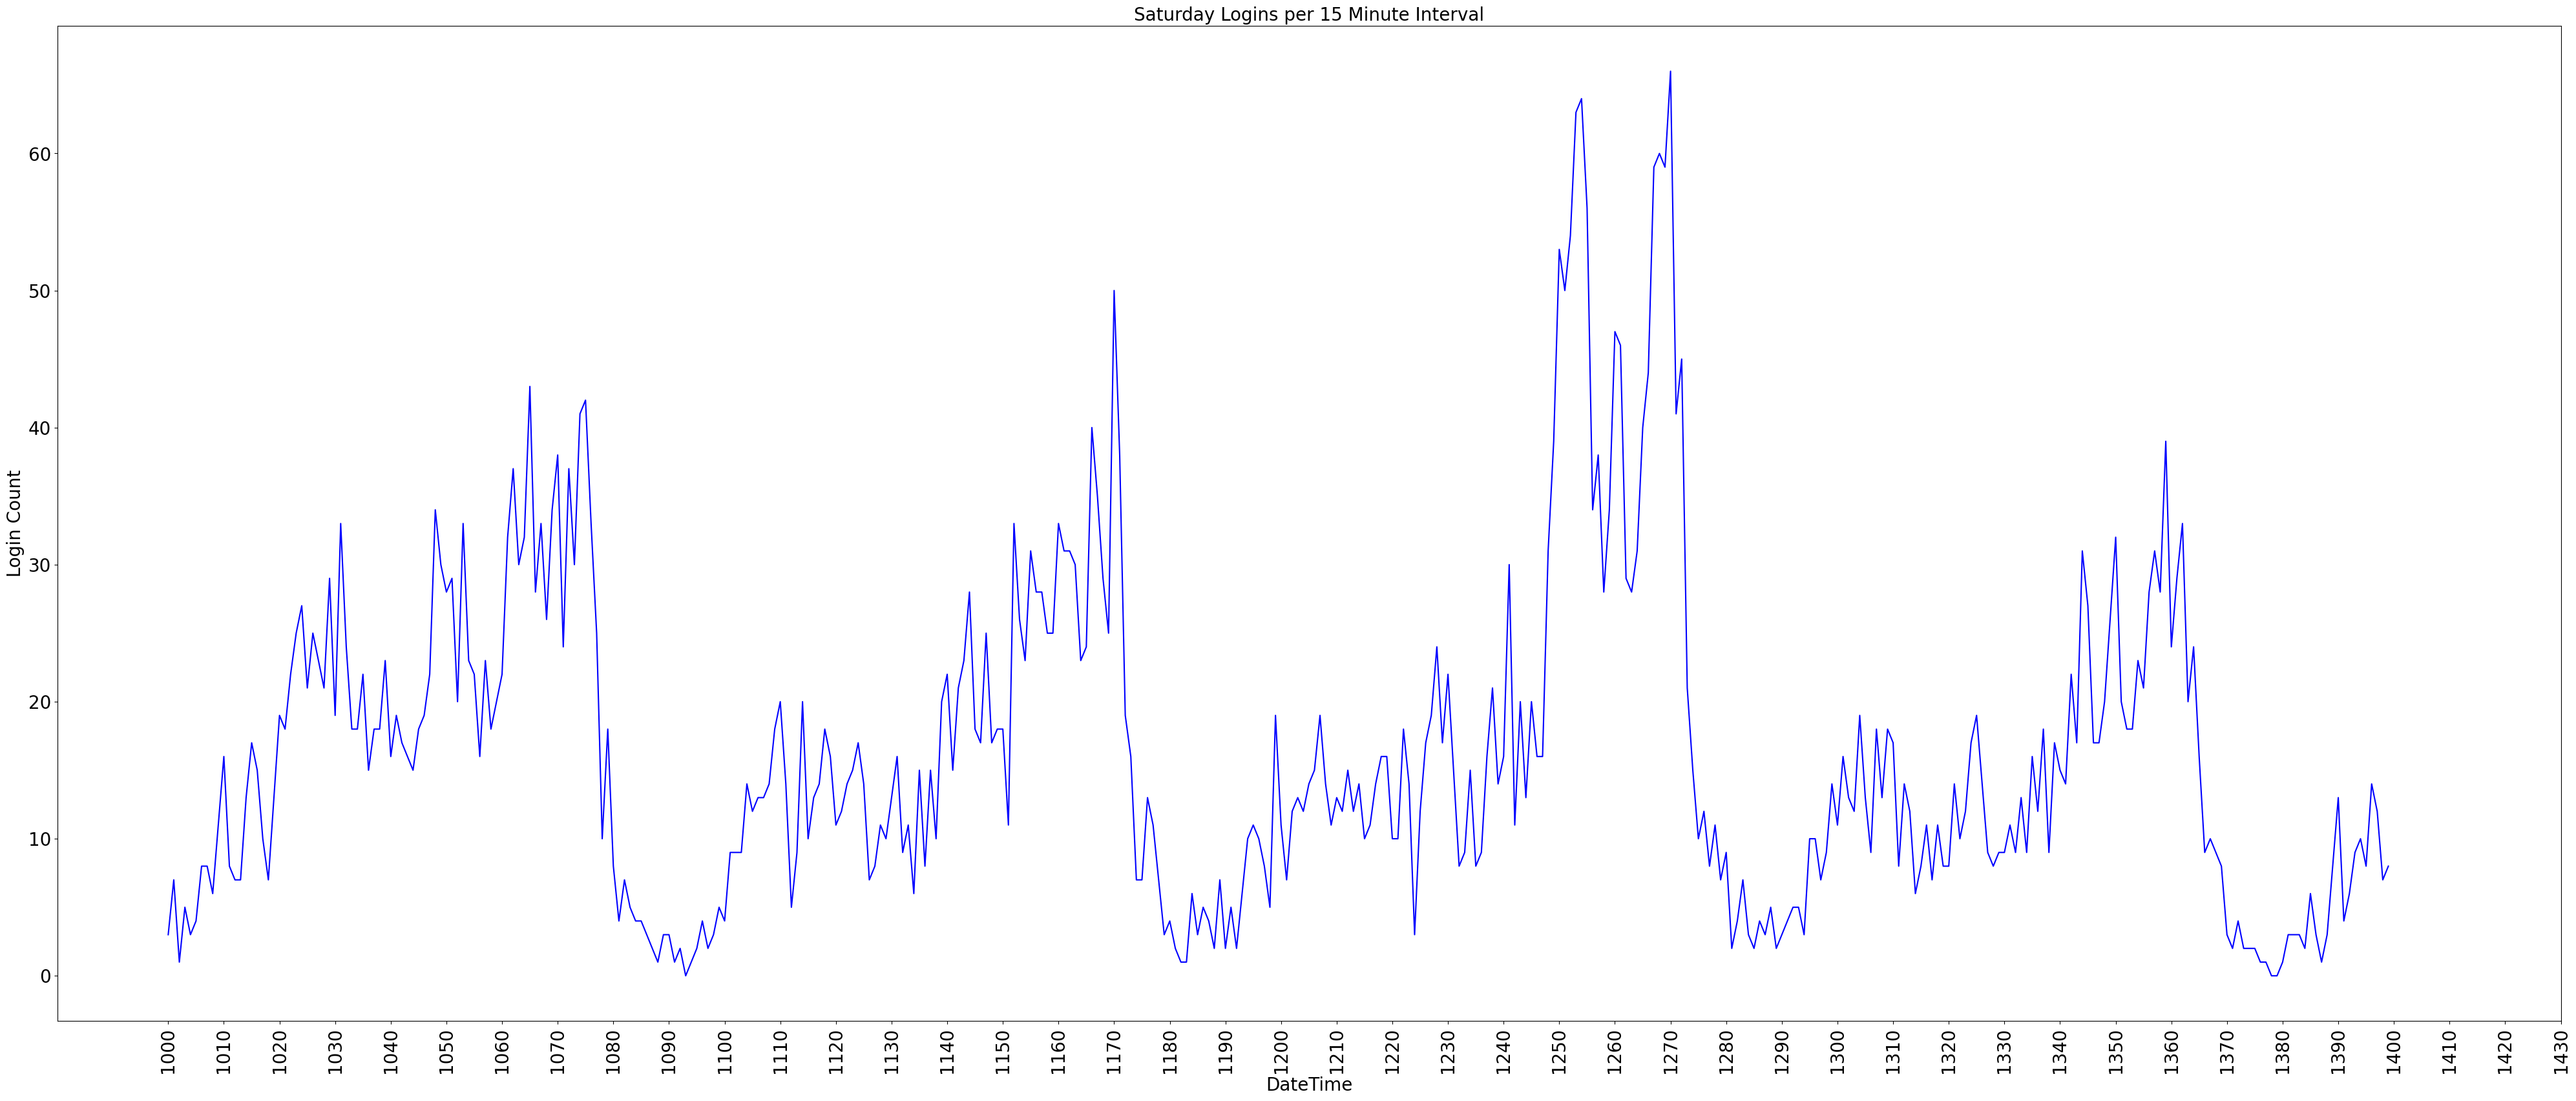

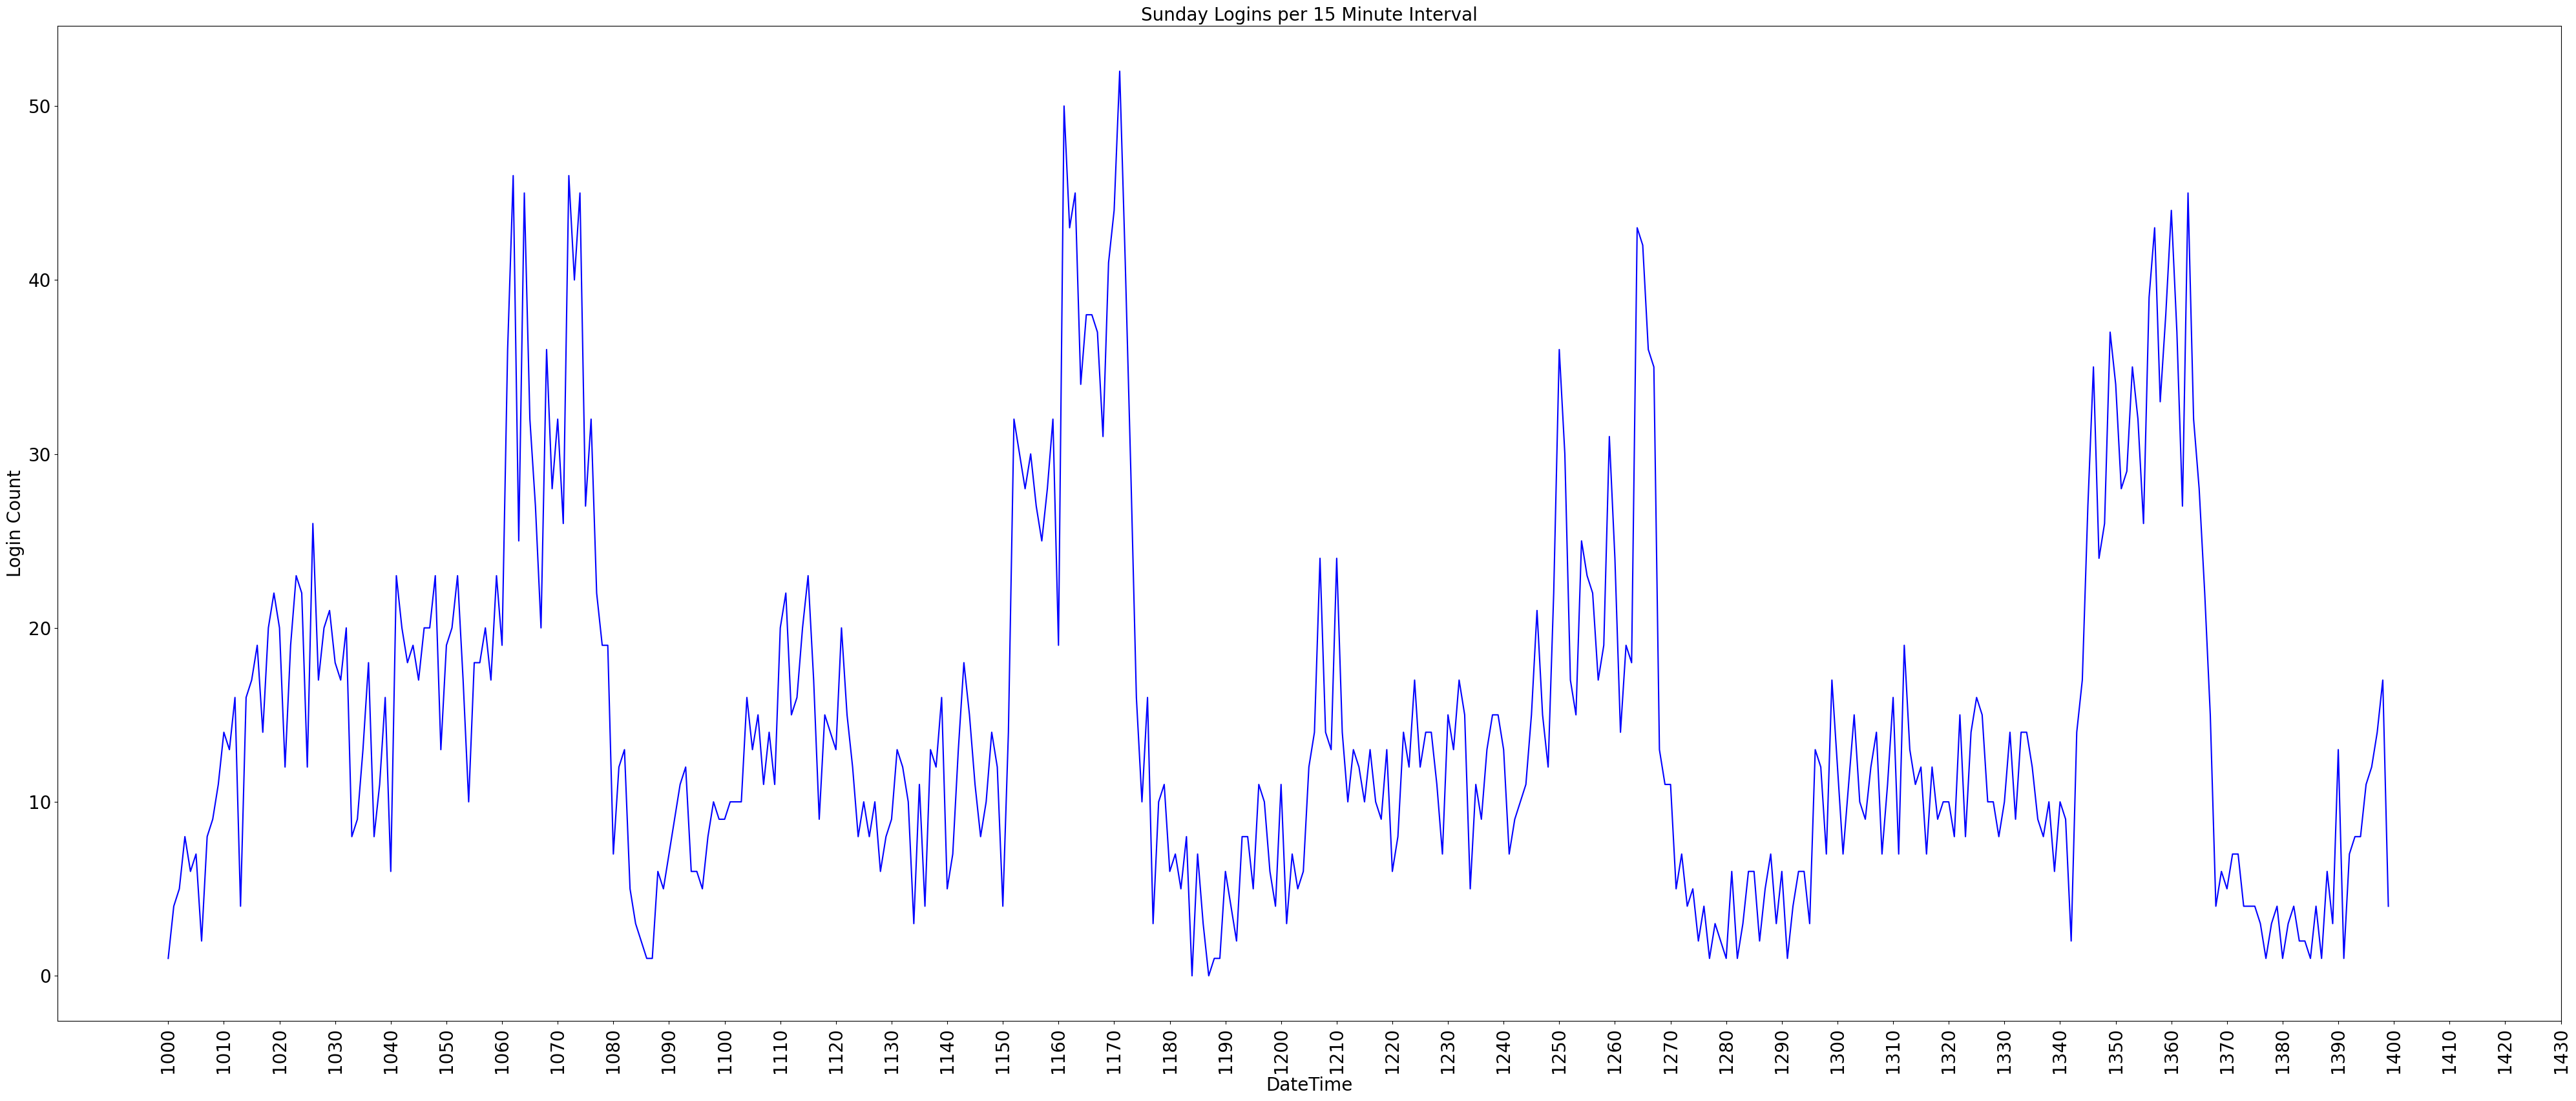

In [198]:
#OK lets look at the distribution for all the days of the week with plots.  We have a general idea that after deleting our first day of data on Thursday that 
#considering rows 1000 - 1400 we have an idea that there is a day time and night time peak and we will see if this holds for Saturdays and Sundays

day_totals = {
    'Monday': Monday_df,
    'Tuesday': Tuesday_df,
    'Wednesday': Wednesday_df,
    'Thursday': Thursday_df,
    'Friday': Friday_df,
    'Saturday': Saturday_df,
    'Sunday': Sunday_df
}

for day, df in day_totals.items():
    plt.figure(figsize=(50, 20))
    df.iloc[1000:1400, 2].plot(x='datetime_string', y='count', kind='line', figsize=(50, 20), color='blue')
    plt.title(f'{day} Logins per 15 Minute Interval', fontsize=20)
    plt.xlabel('DateTime', fontsize=20)
    plt.ylabel('Login Count', fontsize=20)
    plt.xticks(range(1000, len(df), 10), rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    #plt.xticks(rotation=90)
    plt.show()

In [ ]:

#OK we see quite consistent login beahvior Monday Through Wednesday generally between 8pm and 1am
#Thursday the breadth of the evening logins increases in a bit generally between 8pm and 2am
#Friday the breadth of the evening logins increases in a bit generally between 8pm and 2- 3am
#Saturday the breadth of the evening logins increases in a bit generally between 8pm and 5:30

           

In [297]:
print("We can see the corresponding times that the x-axis index above maps to") 
print("which holds for all day_Names since for every day index 0 refers to") 
print("12:00am for each day_Name")
pd.set_option('display.max_rows', 100)
Saturday_df.iloc[1000:1100, 1]

We can see the corresponding times that the x-axis index above maps to
which holds for all day_Names since for every day index 0 refers to
12:00am for each day_Name


1000   1970-03-14 10:00:00
1001   1970-03-14 10:15:00
1002   1970-03-14 10:30:00
1003   1970-03-14 10:45:00
1004   1970-03-14 11:00:00
1005   1970-03-14 11:15:00
1006   1970-03-14 11:30:00
1007   1970-03-14 11:45:00
1008   1970-03-14 12:00:00
1009   1970-03-14 12:15:00
1010   1970-03-14 12:30:00
1011   1970-03-14 12:45:00
1012   1970-03-14 13:00:00
1013   1970-03-14 13:15:00
1014   1970-03-14 13:30:00
1015   1970-03-14 13:45:00
1016   1970-03-14 14:00:00
1017   1970-03-14 14:15:00
1018   1970-03-14 14:30:00
1019   1970-03-14 14:45:00
1020   1970-03-14 15:00:00
1021   1970-03-14 15:15:00
1022   1970-03-14 15:30:00
1023   1970-03-14 15:45:00
1024   1970-03-14 16:00:00
1025   1970-03-14 16:15:00
1026   1970-03-14 16:30:00
1027   1970-03-14 16:45:00
1028   1970-03-14 17:00:00
1029   1970-03-14 17:15:00
1030   1970-03-14 17:30:00
1031   1970-03-14 17:45:00
1032   1970-03-14 18:00:00
1033   1970-03-14 18:15:00
1034   1970-03-14 18:30:00
1035   1970-03-14 18:45:00
1036   1970-03-14 19:00:00
1

ultimate = pd.read_json('../raw_data/ultimate_data_challenge.json')

In [262]:
ultimate.shape

(50000, 12)

In [249]:
ultimate.describe()

trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  
count  50000.000000  50000.000000  50000.000000          49799.000000  
mean       8.849536     60.926084      5.796827              4.778158  
std       19.958811     37.081503      5.707357              0.446652  
min        0.000000      0.000000      0.000000              1.000000  
25%        0.000000     33.300000      2.420000              4.700000  
50%        0.000000     66.700000      3.880000              5.000000  
75%        8.600000    100.000000      6.940000              5.000000  
max      100.000000    100.000000    160.960000              5.000000

In [301]:
ultimate['signup_date'].min(), ultimate['signup_date'].max()

('2014-01-01', '2014-01-31')

In [303]:
ultimate['last_trip_date'].min(), ultimate['last_trip_date'].max()

('2014-01-01', '2014-07-01')

In [299]:
pd.set_option('display.max_rows', 100)
ultimate.iloc[0:100]

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0   King's Landing                       4  2014-01-25                   4.7   
1          Astapor                       0  2014-01-29                   5.0   
2          Astapor                       3  2014-01-06                   4.3   
3   King's Landing                       9  2014-01-10                   4.6   
4       Winterfell                      14  2014-01-27                   4.4   
5       Winterfell                       2  2014-01-09                   3.5   
6          Astapor                       1  2014-01-24                   NaN   
7       Winterfell                       2  2014-01-28                   5.0   
8       Winterfell                       2  2014-01-21                   4.5   
9       Winterfell                       1  2014-01-03                   NaN   
10      Winterfell                       1  2014-01-13                   5.0   
11      Winterfell                       3  2014-01-06                   4.0   
12      Winterfell                       1  2014-01-15                   NaN   
13  King's Landing                       0  2014-01-29                   4.0   
14         Astapor                       1  2014-01-27                   NaN   
15      Winterfell                       1  2014-01-15                   NaN   
16  King's Landing                       1  2014-01-11                   5.0   
17  King's Landing                       0  2014-01-12                   3.9   
18  King's Landing                       6  2014-01-28                   4.6   
19  King's Landing                       0  2014-01-02                   5.0   
20      Winterfell                       1  2014-01-31                   NaN   
21         Astapor                       1  2014-01-09                   NaN   
22      Winterfell                       0  2014-01-24                   NaN   
23  King's Landing                       0  2014-01-21                   5.0   
24         Astapor                       4  2014-01-19                   4.5   
25      Winterfell                       1  2014-01-02                   NaN   
26         Astapor                       1  2014-01-16                   4.0   
27      Winterfell                       3  2014-01-19                   5.0   
28      Winterfell                       0  2014-01-19                   NaN   
29         Astapor                       1  2014-01-27                   4.0   
30         Astapor                       4  2014-01-26                   5.0   
31      Winterfell                       1  2014-01-25                   4.9   
32      Winterfell                       1  2014-01-05                   4.0   
33      Winterfell                       1  2014-01-27                   NaN   
34         Astapor                       1  2014-01-16                   NaN   
35  King's Landing                       2  2014-01-17                   5.0   
36         Astapor                       2  2014-01-21                   NaN   
37         Astapor                       0  2014-01-02                   4.0   
38  King's Landing                      24  2014-01-22                   4.9   
39  King's Landing                       1  2014-01-09                   NaN   
40      Winterfell                       2  2014-01-31                   4.0   
41      Winterfell                       0  2014-01-18                   4.0   
42      Winterfell                       1  2014-01-25                   4.0   
43      Winterfell                       1  2014-01-13                   4.5   
44  King's Landing                       2  2014-01-22                   5.0   
45         Astapor                       3  2014-01-10                   4.0   
46         Astapor                       6  2014-01-20                   5.0   
47      Winterfell                       1  2014-01-18                   5.0   
48      Winterfell                       4  2014-01-04                   4.8   
49      Winter

In [251]:
ultimate['ultimate_black_user'].sum()

18854

In [ ]:
#We Are asked the following question

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
    
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the
observation

c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats

In [ ]:
#We are asked to consider how to measure the success of an experiment to determine the benefit of 
#allowing drivers that tend to be exclusive to neighboring cities due to tolls to reimburse their toll
#expense for driving in the neighboring cities with the idea that the drivers would not tend to be 
#exclusive to a single city.

#Ultimately, the most important measure of success is impact to the bottom line: profits or even sales growth
#Although, not having the data avaialble we might want to ensure quality does not suffer.  E.g. average rating for the drivers.
#Ideally we could do a beta test offering this to one set of drivers but not another to evaluate the following:
1. Does the average rating of the driver get affected
2. Does the driver's revenue get impacted
3. Does the driver's surge percentage suffer
4. Ideally, we would want to start testing for drivers that maintain a regular and predictable schedule to avoid skewing our results.
5. We may want to limit this offering during peak hours in the weekend.

Who we may not want to offer this program to:
A. drivers with a short average distance 
B. Drivers with a last trip date not in the last 7 days 
C. Drivers that do not fall in the upper 25% of ratings
D. Drivers that do not fall in the upper 25% of rating passengers 

We have 50,000 drivers so it should we should be able to meet all this criteria with many drivers. 

It is essential that drivers serve as their own controls.  In a sense this is a single subject test.
We must be able to adequately assess whether the driver's bottom line was impacted
We can only accomplish this with drivers that maintain a consistent schedule. 

Statistical Tests we could use to determine the significance of the observation include:
1. Did the Driver's average rating get worse on those days they utilized the option
2. Did the the average rating the Driver leaves user's get worse during those days they utilized the service
3. Was the driver's surge percentage impacted.   
4. Was the driver's average surge impacted
5. Was sales per hour for the driver impacted. 
6. Was profit per hour for that driver impacted.                     

We will compare drivers with themselves before utilizing the service.
We will also put drivers in a class and compare the classes with eachother.  
            
We will use hypothesis testing setting the threshold to the the 95% significance level.

Effective implementation of a beta test entails a kind of matched pair design.
A matched pair designe would seek to pair a driver with their closest equivalent and then only offer the option
to one of two within a matched pair.  Only if the one of two in the matched pair accepts the service do we include both]
subjects in the testing. What are we doing with the matched pair design?  We are comparing the changes of a drivers 
statistics/varaibles with who accepted the option for the toll coverage or used it with the changes of their matched pair
that was not offered the option.  We want to see if the change in the drivers statistics/variables are statistically
significant from their matched pair.  We will aggregate this for different groups of drivers and run the hypothesis testing.  

Matching subjects is as simple as completing a series of sorts acorss every relevant variable in order of importance and then
creating a column links each pair of consecutive rows.  This could be throungh listing the same number in 2 consecutive rows
after the sort such as 1, 1; 2, 2; 3, 3 .... m,m. 

Let's say hypothetically we decided these are the most important variables in the following order of importance:

1. trips_in_first_30_days
2. avg_rating_of_driver                      
3. surge_pct                      
4. weekday_pct (ascending) - we want this ascending becasue we want to conduct beta testing on the weekend.                       
5. avg_rating_by_driver
6. avg_dist

As a general rule we may want to complete our sorting funciton according to the cardinality of the data
such as categorical True/False. This is a convenitnet way to divide data into two distinct parts depending on the split.
So sorting in order of increasing cardinality may be an effecitve way to implement a matched pair design.  

